# Data Construction: 

### Merging 10 Days of User-Level Ad Impressions

We first merge user-level data across 10 consecutive days, restricting the sample to impressions associated with the top 10 ads of interest. The merged dataset is then filtered to retain only observations with valid geographic coordinates and used as the basis for subsequent analysis.

In [ ]:
import pandas as pd
import os

data_dir = ""

csv_files = [f"Data/v5.i.c-201510{day}.csv" for day in range(21, 32)]

target_ads = [3, 2, 10, 24, 15, 20, 4, 9, 1, 31]

df = pd.concat(
    (pd.read_csv(os.path.join(data_dir, file)) for file in csv_files),
    ignore_index=True
)

df_filtered = df[
    df['LONGITUDE'].notna() &
    df['LATITUDE'].notna() &
    df['CURRENT_AD_ID'].isin(target_ads)
]

filtered_file_path = "filtered_merged_dataset.csv"
df_filtered.to_csv(filtered_file_path, index=False)

print(f"Total records in the raw dataset: {df.shape[0]}")
print(f"Filtered records (valid longitude, latitude, and target ads): {df_filtered.shape[0]}")
print(f"Filtered dataset saved to {filtered_file_path}")


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os

data_dir = ""

csv_files = [f"Data/v5.i.c-201510{day}.csv" for day in range(21, 32)]

target_ads = [3, 2, 10, 24, 15, 20, 4, 9, 1, 31]

df = pd.concat(
    (pd.read_csv(os.path.join(data_dir, file)) for file in csv_files),
    ignore_index=True
)

df_filtered = df[
    df['LONGITUDE'].notna() &
    df['LATITUDE'].notna() &
    df['CURRENT_AD_ID'].isin(target_ads)
]

unique_users = df_filtered['ANDROID_ID'].unique()

train_users, test_users = train_test_split(
    unique_users,
    test_size=0.4,
    random_state=42
)

train_df = df_filtered[df_filtered['ANDROID_ID'].isin(train_users)]
test_df = df_filtered[df_filtered['ANDROID_ID'].isin(test_users)]

train_df.to_csv("train_dataset.csv", index=False)
test_df.to_csv("test_dataset.csv", index=False)

print(f"Total records: {df.shape[0]}")
print(f"Filtered records (with valid longitude and target ads): {df_filtered.shape[0]}")
print(f"Train set: {train_df.shape[0]} rows ({len(train_users)} users)")
print(f"Test set: {test_df.shape[0]} rows ({len(test_users)} users)")


Total records: 34382280
Filtered records (with valid longitude and target ads): 7527296
Train set: 5305293 rows (274938 users)
Test set: 2222003 rows (117831 users)


In [4]:
import pandas as pd
import os

data_dir = ""

csv_files = [f"Data/v5.i.c-201510{day}.csv" for day in range(21, 32)]

target_ads = [3, 2, 10, 24, 15, 20, 4, 9, 1, 31]

df = pd.concat(
    (pd.read_csv(os.path.join(data_dir, file)) for file in csv_files),
    ignore_index=True
)

df_filtered = df[
    df['LONGITUDE'].notna() &
    df['LATITUDE'].notna() &
    df['CURRENT_AD_ID'].isin(target_ads)
]

filtered_file_path = "filtered_merged_dataset.csv"
df_filtered.to_csv(filtered_file_path, index=False)

print(f"Total records in the raw dataset: {df.shape[0]}")
print(f"Filtered records (valid longitude, latitude, and target ads): {df_filtered.shape[0]}")
print(f"Filtered dataset saved to {filtered_file_path}")

Total records in the raw dataset: 34382280
Filtered records (valid longitude, latitude, and target ads): 10537179
Filtered dataset saved to filtered_merged_dataset.csv


We inspect the merged dataset by computing the number of unique values in each column and verifying variable types, with particular attention to the time field. This step provides a basic sanity check on data structure and dimensionality before analysis.


In [6]:
import pandas as pd

file_path = 'filtered_merged_dataset.csv'
df = pd.read_csv(file_path).copy()

unique_values = df.nunique()

print("Number of unique values in each column:")
print(unique_values)

print(f"Data type of TIME column: {df['TIME'].dtype}")

print("\nDataset info:")
print(df.info())

Number of unique values in each column:
IP_ADDRESS            1227584
MEDIA_PACKAGE_NAME       9515
DEVICE_ID              952155
ANDROID_ID             439344
MODEL                    4620
BRAND_ID                    7
DATA                        2
OPERATOR_ID                 3
ISP_ID                      8
LATITUDE               250316
LONGITUDE              280751
CITY                     6306
COUNTRY                   155
PROVINCE                  828
CURRENT_AD_ID              10
PRICE                     435
CLICK                       2
FRAUD_CODE                  7
ANDROID_ID_COUNT            4
YEAR                        1
MONTH                       1
DAY                        12
HOUR                       24
MINUTE                     60
SECOND                     60
TIME                   926631
dtype: int64
Data type of TIME column: int64

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10537179 entries, 0 to 10537178
Data columns (total 26 columns):
 #   

### Some Visualization
We visualize the distribution of each variable by plotting histograms for all columns. Low-cardinality variables are treated as categorical and displayed using bar charts, while high-cardinality or continuous variables are shown using standard histograms. This step helps assess distributional properties and identify potential anomalies.


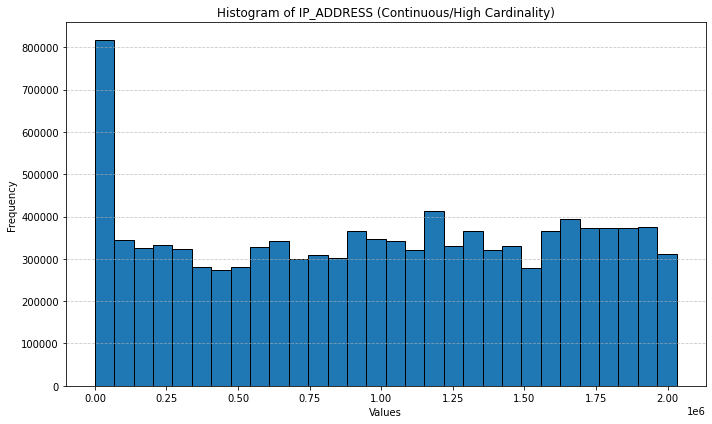

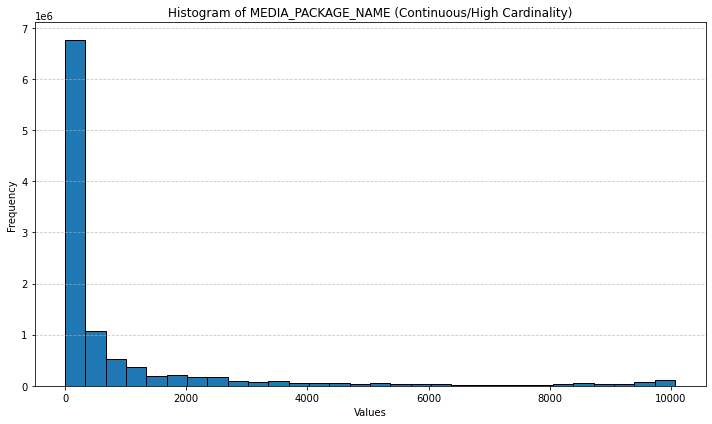

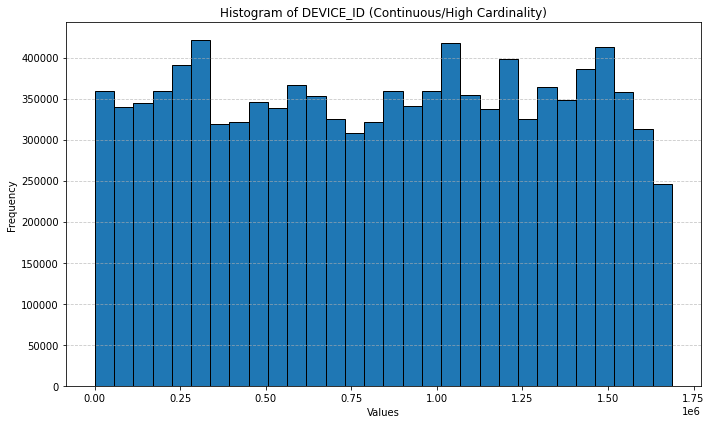

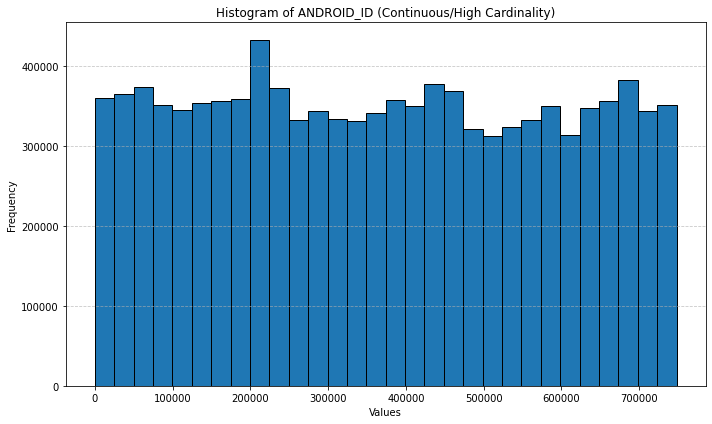

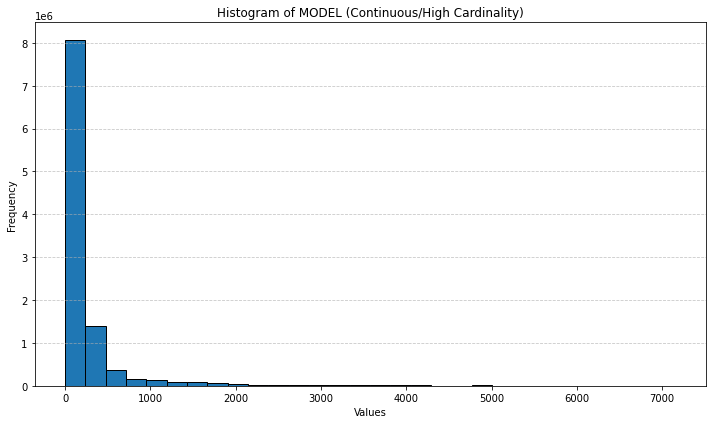

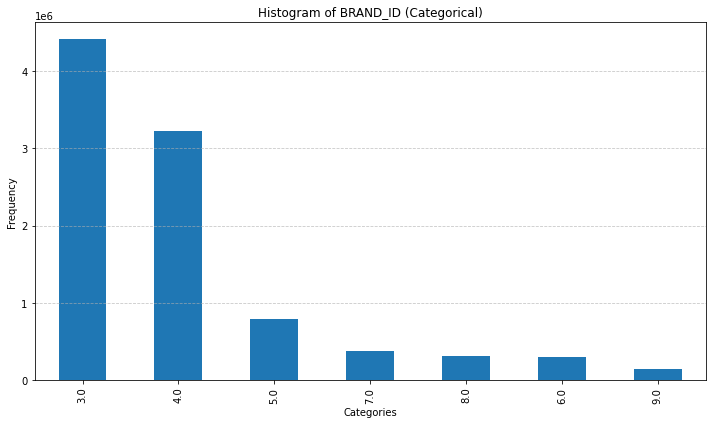

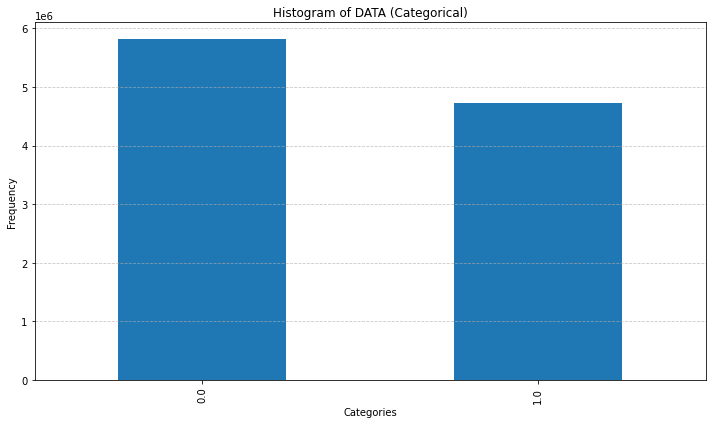

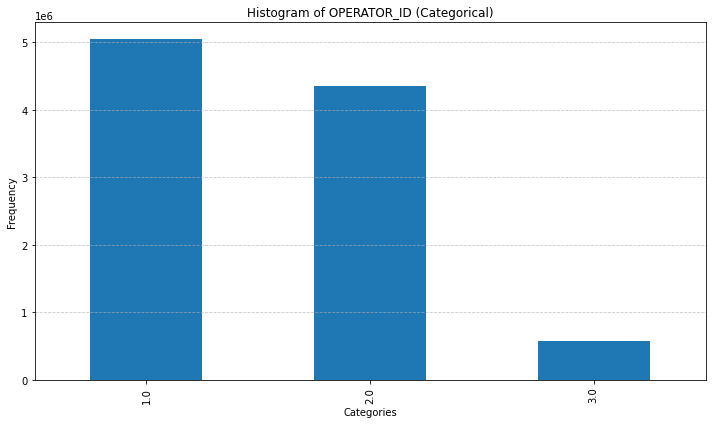

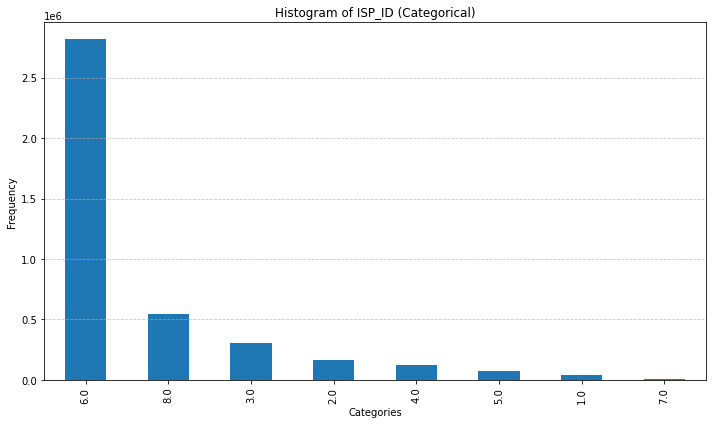

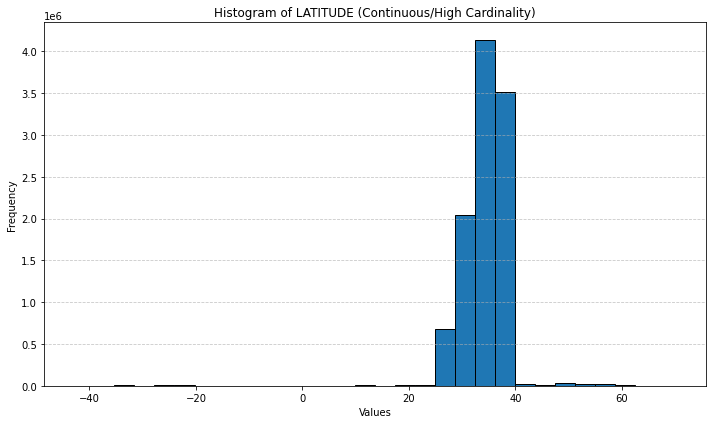

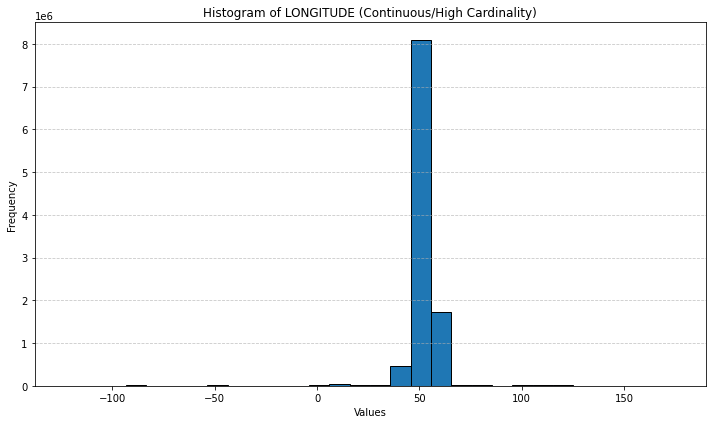

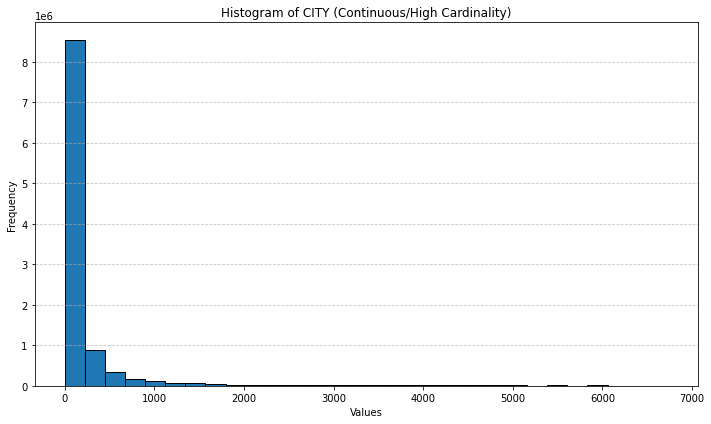

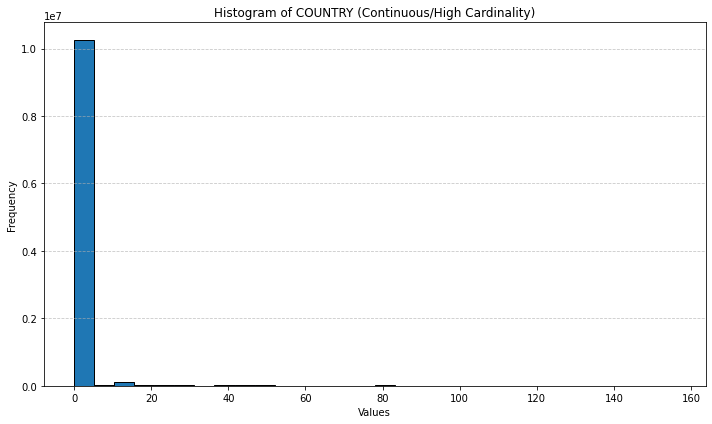

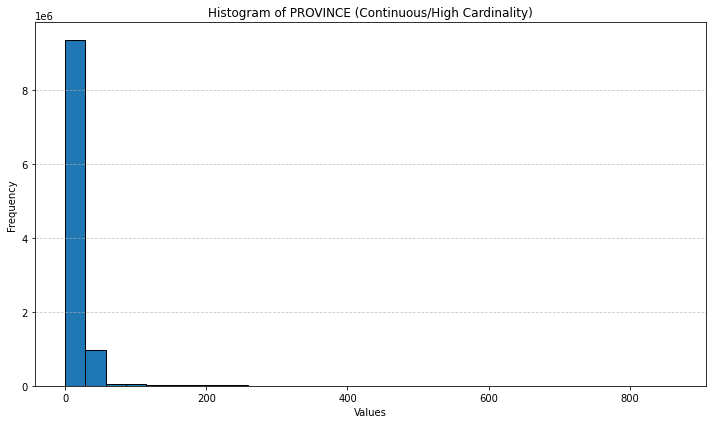

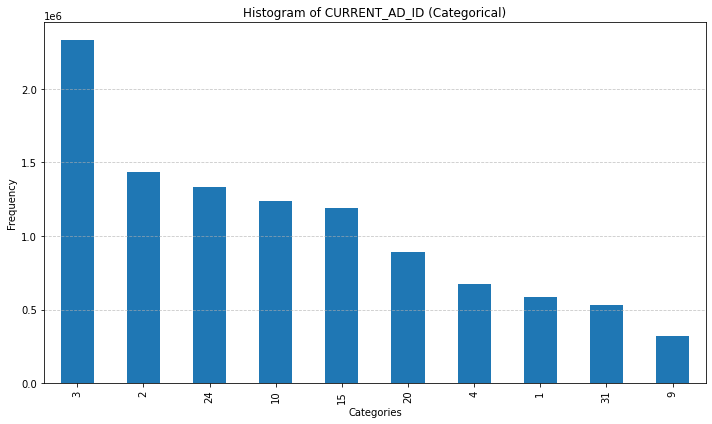

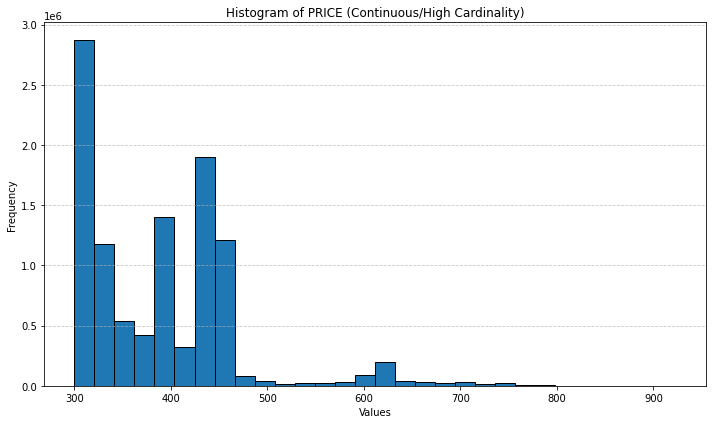

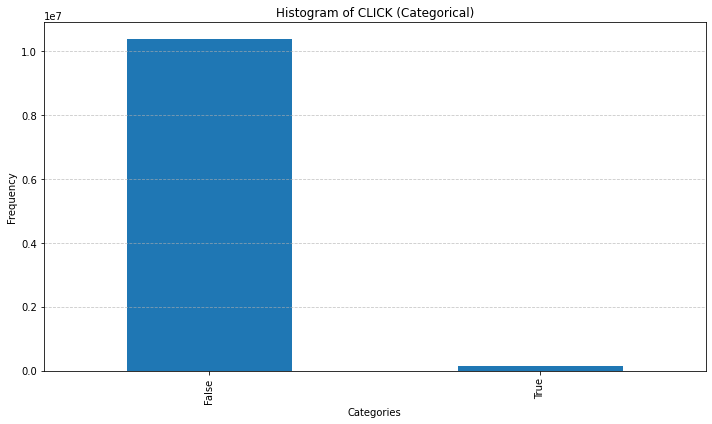

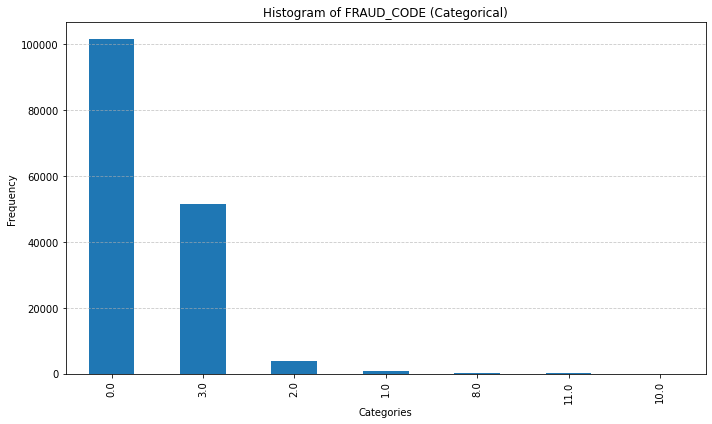

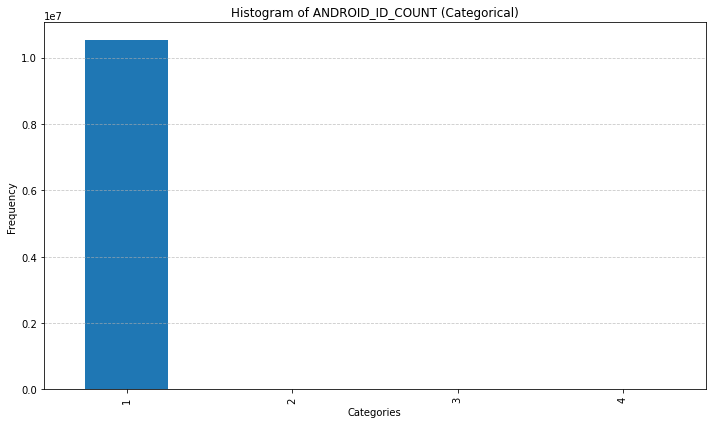

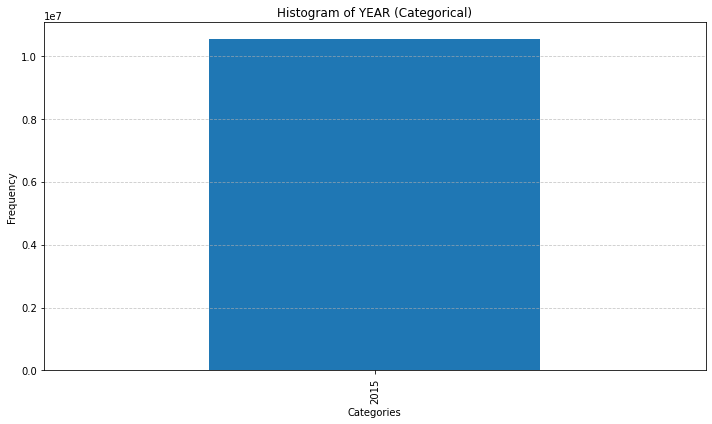

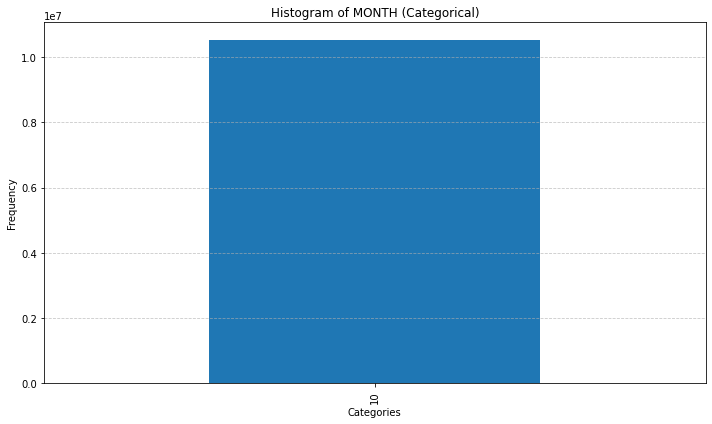

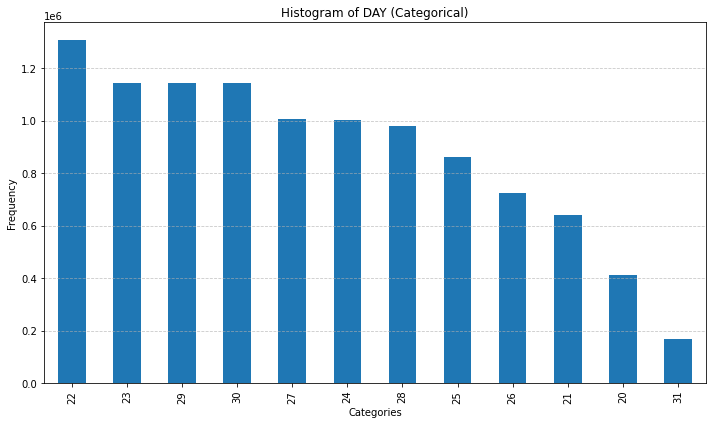

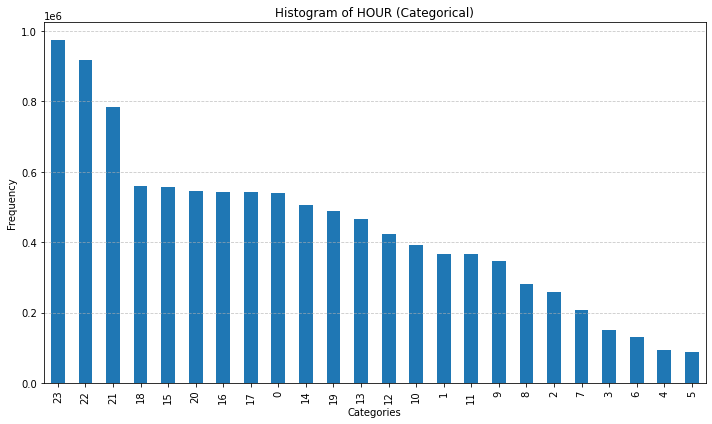

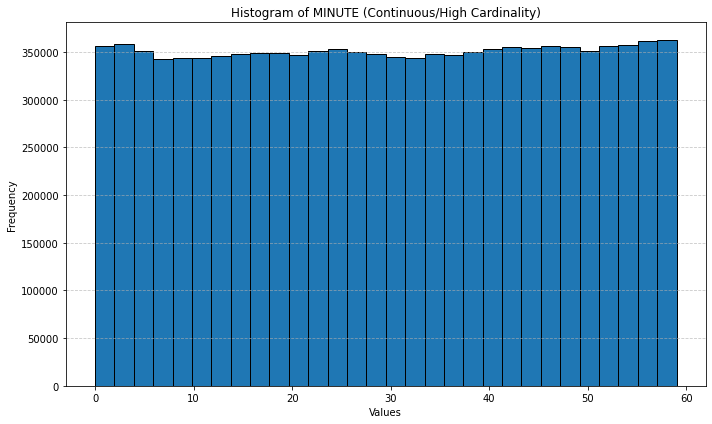

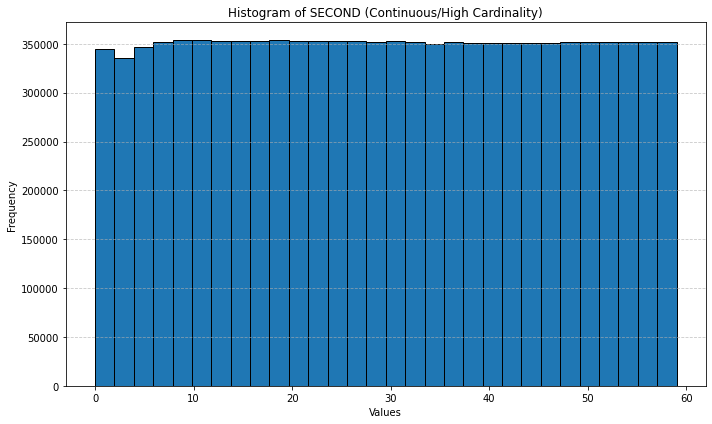

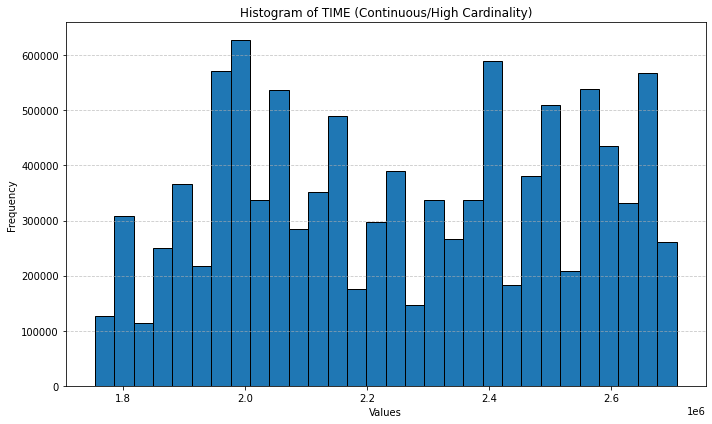

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'filtered_merged_dataset.csv'
df = pd.read_csv(file_path)

for column in df.columns:
    plt.figure(figsize=(10, 6))
    if df[column].nunique() <= 50:
        df[column].value_counts().plot(kind='bar')
        plt.title(f'Histogram of {column} (Categorical)')
        plt.xlabel('Categories')
        plt.ylabel('Frequency')
    else:
        df[column].dropna().plot(kind='hist', bins=30, edgecolor='black')
        plt.title(f'Histogram of {column} (Continuous/High Cardinality)')
        plt.xlabel('Values')
        plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

## Table 1
This procedure constructs **Table 1** by summarizing key categorical variables in the merged dataset, reporting the number of categories, the concentration of the top three values, and the total number of impressions.

In [3]:
import pandas as pd

df = pd.read_csv('filtered_merged_dataset.csv')

categorical_columns = [
    'IP_ADDRESS',
    'MEDIA_PACKAGE_NAME',
    'DEVICE_ID',
    'ANDROID_ID',
    'MODEL',
    'BRAND_ID',
    'DATA',
    'OPERATOR_ID',
    'ISP_ID',
    'CITY',
    'COUNTRY',
    'PROVINCE',
    'CURRENT_AD_ID',
    'FRAUD_CODE'
]

rows = []
for col in categorical_columns:
    vc = df[col].value_counts(dropna=False)
    total = int(vc.sum())
    top3 = vc.head(3)
    pct = (top3 / total * 100).round(2).tolist()
    pct = pct + [0.00] * (3 - len(pct))
    pct_str = [f"{p:.2f}%" for p in pct]

    rows.append({
        'Variable': col,
        'Number of categories': df[col].nunique(dropna=True),
        '1st': pct_str[0],
        '2nd': pct_str[1],
        '3rd': pct_str[2],
        'Number of impressions': total
    })

summary = pd.DataFrame(rows).set_index('Variable')

print(summary.to_markdown())

| Variable           |   Number of categories | 1st    | 2nd    | 3rd    |   Number of impressions |
|:-------------------|-----------------------:|:-------|:-------|:-------|------------------------:|
| IP_ADDRESS         |                1227584 | 0.19%  | 0.15%  | 0.06%  |                10537179 |
| MEDIA_PACKAGE_NAME |                   9515 | 25.69% | 9.44%  | 4.46%  |                10537179 |
| DEVICE_ID          |                 952155 | 0.26%  | 0.18%  | 0.08%  |                10537179 |
| ANDROID_ID         |                 439344 | 0.26%  | 0.18%  | 0.09%  |                10537179 |
| MODEL              |                   4620 | 3.15%  | 2.09%  | 2.03%  |                10537179 |
| BRAND_ID           |                      7 | 41.87% | 30.57% | 9.39%  |                10537179 |
| DATA               |                      2 | 55.14% | 44.86% | 0.00%  |                10537179 |
| OPERATOR_ID        |                      3 | 47.84% | 41.33% | 5.43%  |                1

This code block plots the empirical cumulative distribution of user history length for all impressions and for clicked impressions, illustrating how behavioral histories accumulate across users in the sample.


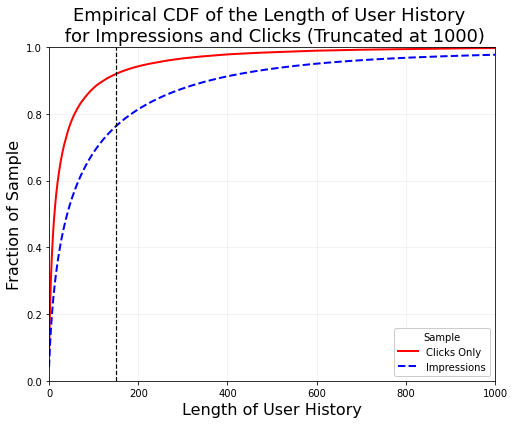

In [4]:
#!/usr/bin/env python3

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

CSV_PATH = "filtered_merged_dataset.csv"
USER_COL = "ANDROID_ID"
TIME_COL = "TIME"
CLICK_COL = "CLICK"
TRUNCATE_AT = 1000
VLINE_AT = 150

def ecdf_grid(values, x_max):
    v = np.asarray(values, dtype=np.int64)
    v = v[np.isfinite(v) & (v >= 0)]
    xs = np.arange(0, int(x_max) + 1, dtype=int)
    if v.size == 0:
        return xs, np.zeros_like(xs, dtype=float)
    v.sort()
    F = np.searchsorted(v, xs, side="right") / v.size
    return xs, F

df = pd.read_csv(CSV_PATH, low_memory=False)

if CLICK_COL not in df.columns:
    raise ValueError(f"Column '{CLICK_COL}' not found.")
df["is_click"] = (pd.to_numeric(df[CLICK_COL], errors="coerce").fillna(0) > 0).astype(int)

if USER_COL not in df.columns:
    raise ValueError(f"Column '{USER_COL}' not found.")
if TIME_COL in df.columns:
    try:
        df[TIME_COL] = pd.to_datetime(df[TIME_COL], errors="raise")
    except Exception:
        pass
    df = df.sort_values([USER_COL, TIME_COL], kind="mergesort")
else:
    df = df.reset_index().rename(columns={"index": "_row_order"})
    df = df.sort_values([USER_COL, "_row_order"], kind="mergesort")

df["history_len"] = df.groupby(USER_COL).cumcount()

x_imp, F_imp = ecdf_grid(df["history_len"].to_numpy(), TRUNCATE_AT)
x_clk, F_clk = ecdf_grid(df.loc[df["is_click"] == 1, "history_len"].to_numpy(), TRUNCATE_AT)

fig, ax = plt.subplots(figsize=(7.25, 6.0))
ax.plot(x_clk, F_clk, color="red", linewidth=2.0, label="Clicks Only")
ax.plot(x_imp, F_imp, color="blue", linewidth=2.0, linestyle="--", label="Impressions")
if VLINE_AT is not None:
    ax.axvline(VLINE_AT, color="black", linestyle="--", linewidth=1.2)

ax.set_xlim(0, TRUNCATE_AT)
ax.set_ylim(0, 1)
ax.set_xlabel("Length of User History", fontsize=16)
ax.set_ylabel("Fraction of Sample", fontsize=16)
ax.set_title("Empirical CDF of the Length of User History \n for Impressions and Clicks (Truncated at 1000)", fontsize=18)
ax.grid(True, linestyle="-", linewidth=0.6, alpha=0.25)
ax.legend(title="Sample", loc="lower right", frameon=True).get_frame().set_alpha(1.0)
plt.tight_layout()
plt.show()

# Feature Generation

We now turn to feature generation. The features used in the analysis are organized into four categories: **static features**, **ad-related features**, **behavioral features**, and **app-related features**. This structure clarifies the information content of each feature group and facilitates systematic evaluation across different informational regimes.


## Static Feature Construction

This step constructs static features that capture time-invariant or slowly changing characteristics of devices, networks, and applications. These features provide baseline contextual information that does not depend on users’ evolving interaction histories and are available at the time an impression is served.

We begin by encoding application identity. To control dimensionality while preserving the most informative variation, we retain the top 50 most frequently observed applications and group all remaining applications into an “Other” category. The resulting app classes are then transformed into integer-valued embeddings using label encoding. An analogous procedure is applied to device models, again retaining the top 50 models and collapsing the rest into a common category before encoding.

We next construct categorical embeddings for additional static attributes, including device brand, mobile operator, and internet service provider. Each of these variables is encoded using label encoders to produce compact numerical representations suitable for downstream machine learning models.

Finally, we encode time-of-day information using cyclic transformations. Hour-of-day and minute-of-hour variables are mapped to sine and cosine representations, preserving their circular structure and allowing models to capture smooth temporal patterns without artificial discontinuities at boundary values.

The resulting dataset augments each impression with a set of static features that summarize device characteristics, network attributes, application identity, and cyclical time information. These features form the baseline input layer for subsequent modeling stages.


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import os

file_path = "grouped_sorted_dataset.csv"

if not os.path.exists(file_path):
    raise FileNotFoundError(f"The file {file_path} does not exist. Please check the path or recreate the dataset.")

df = pd.read_csv(file_path)

top_50_apps = df['MEDIA_PACKAGE_NAME'].value_counts().head(50).index.tolist()
df['MEDIA_PACKAGE_NAME_CLASS'] = df['MEDIA_PACKAGE_NAME'].apply(
    lambda x: x if x in top_50_apps else 'Other'
).astype(str)

label_encoder_media = LabelEncoder()
df['MEDIA_PACKAGE_NAME_EMBEDDING'] = label_encoder_media.fit_transform(df['MEDIA_PACKAGE_NAME_CLASS'])

top_50_models = df['MODEL'].value_counts().head(50).index.tolist()
df['MODEL_CLASS'] = df['MODEL'].apply(
    lambda x: x if x in top_50_models else 'Other'
).astype(str)

label_encoder_model = LabelEncoder()
df['MODEL_EMBEDDING'] = label_encoder_model.fit_transform(df['MODEL_CLASS'])

embedding_features = ['BRAND_ID', 'OPERATOR_ID', 'ISP_ID']
for feature in embedding_features:
    label_encoder = LabelEncoder()
    df[f'{feature}_EMBEDDING'] = label_encoder.fit_transform(df[feature])

df['HOUR_SIN'] = np.sin(2 * np.pi * df['HOUR'] / 24)
df['HOUR_COS'] = np.cos(2 * np.pi * df['HOUR'] / 24)
df['MINUTE_SIN'] = np.sin(2 * np.pi * df['MINUTE'] / 60)
df['MINUTE_COS'] = np.cos(2 * np.pi * df['MINUTE'] / 60)

output_file = "dataset_LSTM.csv"
df.to_csv(output_file, index=False)

print(df[['MEDIA_PACKAGE_NAME', 'MEDIA_PACKAGE_NAME_EMBEDDING',
          'MODEL', 'MODEL_EMBEDDING',
          'BRAND_ID', 'BRAND_ID_EMBEDDING',
          'OPERATOR_ID', 'OPERATOR_ID_EMBEDDING',
          'ISP_ID', 'ISP_ID_EMBEDDING',
          'HOUR', 'HOUR_SIN', 'HOUR_COS',
          'MINUTE', 'MINUTE_SIN', 'MINUTE_COS']].head())

print(f"Dataset saved to {output_file}.")

Dataset with original and additional embedding/cyclic encoding columns:
   MEDIA_PACKAGE_NAME  MEDIA_PACKAGE_NAME_EMBEDDING  MODEL  MODEL_EMBEDDING  \
0                   1                             1      1               50   
1                   1                             1      1               50   
2                   1                             1      1               50   
3                   1                             1      1               50   
4                   1                             1      1               50   

   BRAND_ID  BRAND_ID_EMBEDDING  OPERATOR_ID  OPERATOR_ID_EMBEDDING  ISP_ID  \
0       4.0                   1          2.0                      1     NaN   
1       4.0                   1          2.0                      1     NaN   
2       4.0                   1          2.0                      1     NaN   
3       4.0                   1          2.0                      1     NaN   
4       4.0                   1          2.0              

In [3]:
import pandas as pd

file_path = 'dataset_LSTM.csv'
df = pd.read_csv(file_path).copy()

unique_values = df.nunique()

print("Number of unique values in each column:")
print(unique_values)

print(f"Data type of TIME column: {df['TIME'].dtype}")

print("\nDataset info:")
print(df.info())

Number of unique values in each column:
IP_ADDRESS                      1055975
MEDIA_PACKAGE_NAME                 9368
DEVICE_ID                        807682
ANDROID_ID                       392769
MODEL                              4464
BRAND_ID                              7
DATA                                  2
OPERATOR_ID                           3
ISP_ID                                8
LATITUDE                         225323
LONGITUDE                        252801
CITY                               6145
COUNTRY                             151
PROVINCE                            810
CURRENT_AD_ID                         5
PRICE                               151
CLICK                                 2
FRAUD_CODE                            7
ANDROID_ID_COUNT                      4
YEAR                                  1
MONTH                                 1
DAY                                  12
HOUR                                 24
MINUTE                               60


## Ad-Related Feature Construction

This step constructs a set of ad-related features that summarize users’ historical exposure to, and engagement with, individual ads. The objective is to capture both user–ad–specific learning effects and aggregate ad performance, while ensuring that all features are based solely on information available prior to each impression.

We begin by sorting impressions chronologically within each user. Using this ordering, we compute **ad frequency**, defined as the number of times a given user has been exposed to a particular ad up to and including the current impression. This variable captures repetition and potential wear-in or wear-out effects at the user–ad level.

Next, we construct a user–ad–specific click-through rate (**AD\_CTR**). To avoid look-ahead bias, we shift the click indicator so that the current outcome is excluded, and then compute cumulative clicks and cumulative impressions for each user–ad pair. The ratio of these two quantities yields the historical click-through rate that the user has experienced for that ad. Cases with no prior impressions are handled explicitly by setting the CTR to zero.

In addition to user-specific measures, we compute an **overall ad-level click-through rate (AD\_CTR\_Overall)** that aggregates information across all users. After sorting impressions by ad and time, we again shift the click indicator to exclude the current observation and compute cumulative clicks and impressions for each ad across the entire sample. This variable captures the global performance of an ad on the platform, abstracting from individual user histories.

All intermediate variables used to construct these features are removed once the final quantities are computed. The resulting dataset augments each impression with ad frequency, user–ad–specific CTR, and overall ad-level CTR, providing a compact summary of ad-related historical information for downstream modeling.


In [8]:
import pandas as pd

file_path = "dataset_LSTM.csv"

df = pd.read_csv(file_path)

df = df.sort_values(by=["ANDROID_ID", "TIME"]).reset_index(drop=True)

df['CLICK'] = df['CLICK'].astype(int)

df['AD_FREQUENCY'] = df.groupby(['ANDROID_ID', 'CURRENT_AD_ID']).cumcount() + 1

df['SHIFTED_CLICK'] = df.groupby(['ANDROID_ID', 'CURRENT_AD_ID'])['CLICK'].shift(1, fill_value=0)
df['SHIFTED_CLICK'] = df['SHIFTED_CLICK'].astype(int)

df['CUMULATIVE_CLICKS'] = df.groupby(['ANDROID_ID', 'CURRENT_AD_ID'])['SHIFTED_CLICK'].cumsum()

df['CUMULATIVE_IMPRESSIONS'] = df.groupby(['ANDROID_ID', 'CURRENT_AD_ID']).cumcount()

df['AD_CTR'] = df['CUMULATIVE_CLICKS'] / df['CUMULATIVE_IMPRESSIONS']
df['AD_CTR'] = df['AD_CTR'].fillna(0.0)

df.drop(columns=['SHIFTED_CLICK', 'CUMULATIVE_CLICKS', 'CUMULATIVE_IMPRESSIONS'], inplace=True)

df = df.sort_values(by=['CURRENT_AD_ID', 'TIME']).reset_index(drop=True)

df['SHIFTED_CLICK_OVERALL'] = df.groupby('CURRENT_AD_ID')['CLICK'].shift(1, fill_value=0)
df['SHIFTED_CLICK_OVERALL'] = df['SHIFTED_CLICK_OVERALL'].astype(int)

df['CUMULATIVE_CLICKS_OVERALL'] = df.groupby('CURRENT_AD_ID')['SHIFTED_CLICK_OVERALL'].cumsum()

df['CUMULATIVE_IMPRESSIONS_OVERALL'] = df.groupby('CURRENT_AD_ID').cumcount()

df['AD_CTR_Overall'] = df['CUMULATIVE_CLICKS_OVERALL'] / df['CUMULATIVE_IMPRESSIONS_OVERALL']
df['AD_CTR_Overall'] = df['AD_CTR_Overall'].fillna(0.0)

df = df.sort_values(by=['ANDROID_ID', 'TIME']).reset_index(drop=True)

df.drop(columns=['SHIFTED_CLICK_OVERALL', 'CUMULATIVE_CLICKS_OVERALL', 'CUMULATIVE_IMPRESSIONS_OVERALL'], inplace=True)

output_file = "dataset_LSTM2.csv"
df.to_csv(output_file, index=False)

print(df[['ANDROID_ID', 'CURRENT_AD_ID', 'CLICK', 'AD_FREQUENCY', 'AD_CTR']].head(20))
print(f"Dataset saved to {output_file}.")

/tmp/ipykernel_989136/2130862393.py:7: DtypeWarning: Columns (26,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Dataset with Ad Frequency and CTR columns added:
    ANDROID_ID  CURRENT_AD_ID  CLICK  AD_FREQUENCY  AD_CTR
0            1              1      0             1     0.0
1            1              3      1             1     0.0
2            1              3      1             2     1.0
3            1              4      0             1     0.0
4            1             20      0             1     0.0
5            1             20      0             2     0.0
6            1              3      0             3     1.0
7            2              2      0             1     0.0
8            2             20      0             1     0.0
9            2             20      0             2     0.0
10           2             15      0             1     0.0
11           5             20      0             1     0.0
12           5             20      0             2     0.0
13           5             20      0             3     0.0
14           9              9      0             1     0.0
15     

In [9]:
import pandas as pd

pd.set_option('display.max_rows', 100)

print(df[['ANDROID_ID', 'CURRENT_AD_ID', 'CLICK', 'AD_FREQUENCY', 'AD_CTR', 'AD_CTR_Overall']].head(100))

pd.reset_option('display.max_rows')

    ANDROID_ID  CURRENT_AD_ID  CLICK  AD_FREQUENCY    AD_CTR  AD_CTR_Overall
0            1              1      0             1  0.000000        0.000000
1            1              3      1             1  0.000000        0.000000
2            1              3      1             2  1.000000        1.000000
3            1              4      0             1  0.000000        0.000000
4            1             20      0             1  0.000000        0.000000
5            1             20      0             2  0.000000        0.028571
6            1              3      0             3  1.000000        0.017701
7            2              2      0             1  0.000000        0.000000
8            2             20      0             1  0.000000        0.019231
9            2             20      0             2  0.000000        0.029412
10           2             15      0             1  0.000000        0.000000
11           5             20      0             1  0.000000        0.014678

In [5]:
import pandas as pd

file_path = 'dataset_LSTM2.csv'
df = pd.read_csv(file_path).copy()

unique_values = df.nunique()

# Print the unique value counts
print("Number of unique values in each column:")
print(unique_values)

print(f"Data type of TIME column: {df['TIME'].dtype}")

print("\nDataset info:")
print(df.info())


df = df.sort_values(by=['ANDROID_ID', 'TIME']).reset_index(drop=True)

pd.set_option('display.max_rows', 200)

dff = df.head(2000)

output_file = "TEST2.csv"
dff.to_csv(output_file, index=False)

pd.reset_option('display.max_rows')

Number of unique values in each column:
IP_ADDRESS                      1055975
MEDIA_PACKAGE_NAME                 9368
DEVICE_ID                        807682
ANDROID_ID                       392769
MODEL                              4464
BRAND_ID                              7
DATA                                  2
OPERATOR_ID                           3
ISP_ID                                8
LATITUDE                         225323
LONGITUDE                        252801
CITY                               6145
COUNTRY                             151
PROVINCE                            810
CURRENT_AD_ID                         5
PRICE                               151
CLICK                                 2
FRAUD_CODE                            7
ANDROID_ID_COUNT                      4
YEAR                                  1
MONTH                                 1
DAY                                  12
HOUR                                 24
MINUTE                               60


## Behavioral Feature Construction

We next construct behavioral features that summarize each user’s historical interaction patterns up to a given impression. These features are designed to capture learning, habituation, and recency effects while strictly relying on past information to avoid look-ahead bias.

We begin by ordering impressions chronologically within each user. Using this ordering, we compute the **exposure count (EC)**, defined as the number of prior ad exposures a user has experienced, and the **click history (CH)**, defined as the cumulative number of clicks made by the user up to (but excluding) the current exposure. From these quantities, we derive the **session click-through rate (SCTR)** as the ratio of historical clicks to historical exposures, with appropriate handling of zero-exposure cases.

To capture temporal dynamics, we construct several recency measures. These include the **time since last exposure (TSE)**, the **time since last exposure of the same ad (TSA)**, the **time since last click (TCE)**, and the **time since last click on the same ad (TCA)**. Together, these variables quantify how recently a user has been exposed to ads in general, to a specific ad, and how recently they have engaged through a click, both overall and at the ad level.

Finally, we compute a **user–ad–specific click-through rate (CTR\_{i,Ad})**, defined as the cumulative number of past clicks on a given ad by a user divided by the cumulative number of prior impressions of that ad for the same user. As with all behavioral features, this measure is based exclusively on lagged outcomes to ensure that it reflects information available at the time of decision.

All intermediate quantities used in feature construction are removed after computation, resulting in a clean dataset of behavioral features that summarize users’ historical exposure, engagement, and timing patterns for downstream modeling.


In [10]:
import pandas as pd
import numpy as np

file_path = "dataset_LSTM2.csv"
df = pd.read_csv(file_path)

df['ANDROID_ID'] = df['ANDROID_ID'].astype(int)

if df['CLICK'].dtype == bool:
    df['CLICK'] = df['CLICK'].astype(int)
else:
    df['CLICK'] = df['CLICK'].astype(int)

df = df.sort_values(by=['ANDROID_ID', 'TIME']).reset_index(drop=True)

df['EC'] = df.groupby('ANDROID_ID').cumcount()

df['CH'] = df.groupby('ANDROID_ID')['CLICK'].cumsum().shift(1, fill_value=0)

first_indices = df.groupby('ANDROID_ID').head(1).index
df.loc[first_indices, 'CH'] = 0

first_ch = df.loc[first_indices, ['ANDROID_ID', 'CH']]
print(first_ch)

df['SCTR'] = df['CH'] / df['EC']
df['SCTR'] = df['SCTR'].replace([np.inf, np.nan], 0.0)

df['TSE'] = df.groupby('ANDROID_ID')['TIME'].diff().fillna(0).astype('int64')

df['TSA'] = df.groupby(['ANDROID_ID', 'CURRENT_AD_ID'])['TIME'].diff().fillna(0).astype('int64')

df['CLICK_TIME'] = df['TIME'].where(df['CLICK'] == 1)
df['LAST_CLICK_TIME'] = df.groupby('ANDROID_ID')['CLICK_TIME'].shift(1)
df['LAST_CLICK_TIME'] = df.groupby('ANDROID_ID')['LAST_CLICK_TIME'].ffill()
df['TCE'] = (df['TIME'] - df['LAST_CLICK_TIME']).fillna(0).astype('int64')

df['AD_CLICK_TIME'] = df['TIME'].where(df['CLICK'] == 1)
df['LAST_AD_CLICK_TIME'] = df.groupby(['ANDROID_ID', 'CURRENT_AD_ID'])['AD_CLICK_TIME'].shift(1)
df['LAST_AD_CLICK_TIME'] = df.groupby(['ANDROID_ID', 'CURRENT_AD_ID'])['LAST_AD_CLICK_TIME'].ffill()
df['TCA'] = (df['TIME'] - df['LAST_AD_CLICK_TIME']).fillna(0).astype('int64')

df['SHIFTED_CLICK'] = df.groupby(['ANDROID_ID', 'CURRENT_AD_ID'])['CLICK'].shift(1, fill_value=0)
df['CUMULATIVE_CLICKS'] = df.groupby(['ANDROID_ID', 'CURRENT_AD_ID'])['SHIFTED_CLICK'].cumsum()
df['CUMULATIVE_IMPRESSIONS'] = df.groupby(['ANDROID_ID', 'CURRENT_AD_ID']).cumcount()
df['CTR_i_Ad'] = df['CUMULATIVE_CLICKS'] / df['CUMULATIVE_IMPRESSIONS']
df['CTR_i_Ad'] = df['CTR_i_Ad'].replace([np.inf, np.nan], 0.0)

df.drop(columns=[
    'CLICK_TIME', 'LAST_CLICK_TIME', 'AD_CLICK_TIME', 'LAST_AD_CLICK_TIME',
    'SHIFTED_CLICK', 'CUMULATIVE_CLICKS', 'CUMULATIVE_IMPRESSIONS'
], inplace=True)

output_file = "dataset_LSTM3.csv"
df.to_csv(output_file, index=False)

print(f"Dataset saved to {output_file}.")

/tmp/ipykernel_989136/1155283749.py:6: DtypeWarning: Columns (26,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


First 'CH' values for each user after manual correction:
          ANDROID_ID  CH
0                  1   0
7                  2   0
11                 5   0
14                 9   0
24                13   0
...              ...  ..
10537109      748070   0
10537112      748071   0
10537114      748072   0
10537124      748078   0
10537178      748080   0

[439344 rows x 2 columns]
Dataset with Behavioral Information columns added and first 'CH' values set to zero.
Dataset saved to dataset_LSTM3.csv.


In [11]:
import pandas as pd
df = df.sort_values(by=['ANDROID_ID', 'TIME']).reset_index(drop=True)

pd.set_option('display.max_rows', 200)

print(df[['ANDROID_ID', 'CURRENT_AD_ID', 'CLICK', 'TIME', 'EC', 'CH', 'SCTR', 'TSE', 'TSA', 'TCE', 'TCA', 'CTR_i_Ad']].head(200))


pd.reset_option('display.max_rows')

     ANDROID_ID  CURRENT_AD_ID  CLICK     TIME   EC  CH      SCTR     TSE  \
0             1              1      0  1754345    0   0  0.000000       0   
1             1              3      1  1754346    1   0  0.000000       1   
2             1              3      1  1754346    2   1  0.500000       0   
3             1              4      0  1754346    3   2  0.666667       0   
4             1             20      0  1754392    4   2  0.500000      46   
5             1             20      0  1754507    5   2  0.400000     115   
6             1              3      0  1974424    6   2  0.333333  219917   
7             2              2      0  1754346    0   0  0.000000       0   
8             2             20      0  1754453    1   0  0.000000     107   
9             2             20      0  1754500    2   0  0.000000      47   
10            2             15      0  1754609    3   0  0.000000     109   
11            5             20      0  1755588    0   0  0.000000       0   

In [14]:
import pandas as pd

file_path = 'dataset_LSTM3.csv'
df = pd.read_csv(file_path).copy()

unique_values = df.nunique()

print("Number of unique values in each column:")
print(unique_values)

print(f"Data type of TIME column: {df['TIME'].dtype}")

print("\nDataset info:")
print(df.info())

df = df.sort_values(by=['ANDROID_ID', 'TIME']).reset_index(drop=True)

pd.set_option('display.max_rows', 200)

dff = df.head(2000)

output_file = "TEST3.csv"
dff.to_csv(output_file, index=False)

pd.reset_option('display.max_rows')

Number of unique values in each column:
IP_ADDRESS                      1055975
MEDIA_PACKAGE_NAME                 9368
DEVICE_ID                        807682
ANDROID_ID                       392769
MODEL                              4464
BRAND_ID                              7
DATA                                  2
OPERATOR_ID                           3
ISP_ID                                8
LATITUDE                         225323
LONGITUDE                        252801
CITY                               6145
COUNTRY                             151
PROVINCE                            810
CURRENT_AD_ID                         5
PRICE                               151
CLICK                                 2
FRAUD_CODE                            7
ANDROID_ID_COUNT                      4
YEAR                                  1
MONTH                                 1
DAY                                  12
HOUR                                 24
MINUTE                               60


## App-Related Feature Construction

We finally construct app-related features that capture how users interact with ads across different applications, as well as how applications perform in aggregate. These features are designed to reflect user–app affinities, app-specific effectiveness, and platform-wide app dynamics, while relying exclusively on historical information available prior to each exposure.

At the user level, we compute **Usage\_App**, defined as the fraction of a user’s prior exposures that occurred within a given application. This measure captures the relative intensity of a user’s engagement with an app compared to their overall exposure history. We also compute **Effect\_App**, which measures the share of a user’s cumulative clicks that occurred within a given app, summarizing how effective that app has been for generating engagement for the user.

To capture interactions at a finer granularity, we construct user–ad–app features. **Preference\_App** measures the fraction of a user’s prior exposures to a specific ad that occurred within a given app, while **Influence\_App** measures the fraction of the user’s prior clicks on that ad that were generated within the app. Together, these variables capture whether an app is particularly associated with exposure to, or engagement with, a specific ad for a given user.

We also compute platform-level app features that abstract from individual users. **Overall\_Usage\_App** measures the share of total historical exposures on the platform attributable to a given app, capturing its relative prominence in the ad ecosystem. **Overall\_Effect\_App** measures the share of total historical clicks generated by each app, capturing its aggregate effectiveness at driving engagement.

All app-related features are constructed using lagged exposures and clicks, with explicit handling of initial observations to avoid undefined ratios and look-ahead bias. Intermediate variables used in the construction process are removed after computation, yielding a final dataset of app-related features suitable for downstream modeling and analysis.


In [12]:
import pandas as pd
import numpy as np

file_path = "dataset_LSTM3.csv"
df = pd.read_csv(file_path)

df = df.sort_values(by=['ANDROID_ID', 'TIME']).reset_index(drop=True)

df['Total_Exposures_User'] = df.groupby('ANDROID_ID').cumcount()
df['Exposures_User_App'] = df.groupby(['ANDROID_ID', 'MEDIA_PACKAGE_NAME_EMBEDDING']).cumcount()
df['Usage_App'] = df['Exposures_User_App'] / df['Total_Exposures_User']
df['Usage_App'] = df['Usage_App'].replace([np.inf, np.nan], 0.0)

df['Cumulative_Clicks_User'] = df.groupby('ANDROID_ID')['CLICK'].cumsum().shift(1, fill_value=0)

df = df.sort_values(by=['ANDROID_ID', 'MEDIA_PACKAGE_NAME_EMBEDDING', 'TIME']).reset_index(drop=True)
df['Cumulative_Clicks_User_App'] = df.groupby(['ANDROID_ID', 'MEDIA_PACKAGE_NAME_EMBEDDING'])['CLICK'].cumsum().shift(1, fill_value=0)

df['Effect_App'] = df['Cumulative_Clicks_User_App'] / df['Cumulative_Clicks_User']
df['Effect_App'] = df['Effect_App'].replace([np.inf, np.nan], 0.0)

df = df.sort_values(by=['TIME']).reset_index(drop=True)
first_indices = df.groupby('ANDROID_ID').head(1).index
df.loc[first_indices, 'Effect_App'] = 0

df = df.sort_values(by=['ANDROID_ID', 'TIME']).reset_index(drop=True)

df['Total_Exposures_User_Ad'] = df.groupby(['ANDROID_ID', 'CURRENT_AD_ID']).cumcount()
df['Exposures_User_Ad_App'] = df.groupby(['ANDROID_ID', 'CURRENT_AD_ID', 'MEDIA_PACKAGE_NAME_EMBEDDING']).cumcount()
df['Preference_App'] = df['Exposures_User_Ad_App'] / df['Total_Exposures_User_Ad']
df['Preference_App'] = df['Preference_App'].replace([np.inf, np.nan], 0.0)

first_indices = df.groupby('ANDROID_ID').head(1).index
df.loc[first_indices, 'Preference_App'] = 0

df['Cumulative_Clicks_User_Ad'] = df.groupby(['ANDROID_ID', 'CURRENT_AD_ID'])['CLICK'].cumsum().shift(1, fill_value=0)
df['Cumulative_Clicks_User_Ad_App'] = df.groupby(['ANDROID_ID', 'CURRENT_AD_ID', 'MEDIA_PACKAGE_NAME_EMBEDDING'])['CLICK'].cumsum().shift(1, fill_value=0)

df['Influence_App'] = df['Cumulative_Clicks_User_Ad_App'] / df['Cumulative_Clicks_User_Ad']
df['Influence_App'] = df['Influence_App'].replace([np.inf, np.nan], 0.0)

df = df.sort_values('TIME').reset_index(drop=True)
first_indices = df.groupby('ANDROID_ID').head(1).index
df.loc[first_indices, 'Influence_App'] = 0

df = df.sort_values('TIME').reset_index(drop=True)

df['Total_Exposures_All'] = df.index
df['Cumulative_Exposures_App'] = df.groupby('MEDIA_PACKAGE_NAME_EMBEDDING').cumcount()
df['Overall_Usage_App'] = df['Cumulative_Exposures_App'] / df['Total_Exposures_All']
df['Overall_Usage_App'] = df['Overall_Usage_App'].replace([np.inf, np.nan], 0.0)

df = df.sort_values('TIME').reset_index(drop=True)

df['Cumulative_Clicks_All'] = df['CLICK'].cumsum().shift(1, fill_value=0)
df['Cumulative_Clicks_App'] = df.groupby('MEDIA_PACKAGE_NAME_EMBEDDING')['CLICK'].cumsum().shift(1, fill_value=0)

first_indices = df.groupby('MEDIA_PACKAGE_NAME_EMBEDDING').head(1).index
df.loc[first_indices, 'Cumulative_Clicks_App'] = 0

df['Overall_Effect_App'] = df['Cumulative_Clicks_App'] / df['Cumulative_Clicks_All']
df['Overall_Effect_App'] = df['Overall_Effect_App'].replace([np.inf, np.nan], 0.0)

df = df.sort_values('TIME').reset_index(drop=True)
first_indices = df.groupby('MEDIA_PACKAGE_NAME_EMBEDDING').head(1).index
df.loc[first_indices, 'Overall_Effect_App'] = 0

df.drop(columns=[
    'Total_Exposures_User', 'Exposures_User_App', 'Cumulative_Clicks_User', 'Cumulative_Clicks_User_App',
    'Total_Exposures_User_Ad', 'Exposures_User_Ad_App', 'Cumulative_Clicks_User_Ad', 'Cumulative_Clicks_User_Ad_App',
    'Total_Exposures_All', 'Cumulative_Exposures_App', 'Cumulative_Clicks_All', 'Cumulative_Clicks_App'
], inplace=True)

df = df.sort_values(by=['ANDROID_ID', 'TIME']).reset_index(drop=True)

print(df.head())

output_file = "dataset_LSTM4.csv"
df.to_csv(output_file, index=False)

print(f"Dataset saved to {output_file}.")

/tmp/ipykernel_989136/2454550193.py:6: DtypeWarning: Columns (26,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


   IP_ADDRESS  MEDIA_PACKAGE_NAME  DEVICE_ID  ANDROID_ID  MODEL  BRAND_ID  \
0           1                   1          1           1      1       4.0   
1           1                   1          1           1      1       4.0   
2           1                   1          1           1      1       4.0   
3           1                   1          1           1      1       4.0   
4           1                   1          1           1      1       4.0   

   DATA  OPERATOR_ID  ISP_ID   LATITUDE  ...  TSA  TCE  TCA  CTR_i_Ad  \
0   0.0          2.0     NaN  35.495495  ...    0    0    0       0.0   
1   0.0          2.0     NaN  35.495495  ...    0    0    0       1.0   
2   0.0          2.0     NaN  35.495495  ...    0    0    0       0.0   
3   0.0          2.0     NaN  35.495495  ...    0    0    0       0.0   
4   0.0          2.0     NaN  35.495495  ...    0   46    0       0.0   

   Usage_App  Effect_App  Preference_App  Influence_App  Overall_Usage_App  \
0        0.0        

In [13]:
import pandas as pd

file_path = 'dataset_LSTM4.csv'
df = pd.read_csv(file_path).copy()

unique_values = df.nunique()

print("Number of unique values in each column:")
print(unique_values)

print(f"Data type of TIME column: {df['TIME'].dtype}")

print("\nDataset info:")
print(df.info())

df = df.sort_values(by=['TIME', 'ANDROID_ID']).reset_index(drop=True)

pd.set_option('display.max_rows', 200)

dff = df.head(2000)

output_file = "TEST4.csv"
dff.to_csv(output_file, index=False)

pd.reset_option('display.max_rows')

/tmp/ipykernel_989136/1211492432.py:5: DtypeWarning: Columns (26,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path).copy()


Number of unique values in each column:
IP_ADDRESS                       1227584
MEDIA_PACKAGE_NAME                  9515
DEVICE_ID                         952155
ANDROID_ID                        439344
MODEL                               4620
BRAND_ID                               7
DATA                                   2
OPERATOR_ID                            3
ISP_ID                                 8
LATITUDE                          250316
LONGITUDE                         280751
CITY                                6306
COUNTRY                              155
PROVINCE                             828
CURRENT_AD_ID                         10
PRICE                                435
CLICK                                  2
FRAUD_CODE                             7
ANDROID_ID_COUNT                       4
YEAR                                   1
MONTH                                  1
DAY                                   12
HOUR                                  24
MINUTE           

# Train & Test

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
output_file = "dataset_LSTM4.csv"
data = pd.read_csv(output_file)

# Display class distribution for CLICK column
print("\nClass distribution (CLICK):")
print(data['CLICK'].value_counts())

# Get user-level click rate and exposure count
user_stats = data.groupby('ANDROID_ID').agg(
    CLICK_RATE=('CLICK', 'mean'),
    EXPOSURE_COUNT=('CLICK', 'size')
).reset_index()

# Filter users with at least two exposures
eligible_users = user_stats[user_stats['EXPOSURE_COUNT'] >= 2]
single_exposure_users = user_stats[user_stats['EXPOSURE_COUNT'] < 2]

# Bin CLICK_RATE into categories for stratification
eligible_users['CLICK_RATE_BIN'] = pd.cut(
    eligible_users['CLICK_RATE'], 
    bins=[-0.01, 0.001, 0.01, 0.1, 1.0],  # Adjust bins based on the data distribution
    labels=["Very Low", "Low", "Medium", "High"]
)

# Stratified split for eligible users
train_users, test_users = train_test_split(
    eligible_users['ANDROID_ID'],
    test_size=0.2,
    random_state=42,
    stratify=eligible_users['CLICK_RATE_BIN']
)

# Assign single-exposure users to training set
train_users = train_users.tolist() + single_exposure_users['ANDROID_ID'].tolist()

# Create train and test datasets
train_data = data[data['ANDROID_ID'].isin(train_users)]
test_data = data[data['ANDROID_ID'].isin(test_users)]

# Display the number of records in each split
print(f"\nTrain data size: {len(train_data)}")
print(f"Test data size: {len(test_data)}")

# Display class distribution in train and test sets
print("\nClass distribution in Train (CLICK):")
print(train_data['CLICK'].value_counts())
print("\nClass distribution in Test (CLICK):")
print(test_data['CLICK'].value_counts())

# Save train and test datasets
train_data.to_csv("train_dataset_LSTM4.csv", index=False)
test_data.to_csv("test_dataset_LSTM4.csv", index=False)

print("\nTrain and test datasets saved as 'train_dataset_LSTM4.csv' and 'test_dataset_LSTM4.csv'.")



Class distribution (CLICK):
CLICK
0    7408315
1     118981
Name: count, dtype: int64


/tmp/ipykernel_1252801/3348248673.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eligible_users['CLICK_RATE_BIN'] = pd.cut(



Train data size: 6022708
Test data size: 1504588

Class distribution in Train (CLICK):
CLICK
0    5926936
1      95772
Name: count, dtype: int64

Class distribution in Test (CLICK):
CLICK
0    1481379
1      23209
Name: count, dtype: int64

Train and test datasets saved as 'train_dataset_LSTM4.csv' and 'test_dataset_LSTM4.csv'.


# PreProcessing

In [6]:
# Code Block 1: Data Loading and Preprocessing

import pandas as pd
import numpy as np
import gc
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv("dataset_LSTM4.csv").copy()  # Adjust the file name if necessary

# Display class distribution for CLICK column
print("\nClass distribution (CLICK):")
print(data['CLICK'].value_counts())

# Get user-level click rate and exposure count
user_stats = data.groupby('ANDROID_ID').agg(
    CLICK_RATE=('CLICK', 'mean'),
    EXPOSURE_COUNT=('CLICK', 'size')
).reset_index()

# Filter users with at least two exposures
eligible_users = user_stats[user_stats['EXPOSURE_COUNT'] >= 2]
single_exposure_users = user_stats[user_stats['EXPOSURE_COUNT'] < 2]

# Bin CLICK_RATE into categories for stratification
eligible_users['CLICK_RATE_BIN'] = pd.cut(
    eligible_users['CLICK_RATE'],
    bins=[-0.01, 0.001, 0.01, 0.1, 1.0],
    labels=["Very Low", "Low", "Medium", "High"]
)

# Stratified split for eligible users
train_users, test_users = train_test_split(
    eligible_users['ANDROID_ID'],
    test_size=0.2,
    random_state=42,
    stratify=eligible_users['CLICK_RATE_BIN']
)

# Assign single-exposure users to training set
train_users = train_users.tolist() + single_exposure_users['ANDROID_ID'].tolist()

# Create train and test datasets
train_data = data[data['ANDROID_ID'].isin(train_users)].copy()
test_data = data[data['ANDROID_ID'].isin(test_users)].copy()

# Release memory
del data, user_stats, eligible_users, single_exposure_users
gc.collect()

# Proceed with data preprocessing
# Combine train and test data for consistent preprocessing
data_combined = pd.concat([train_data, test_data], axis=0)

# Handle missing values
data_combined.fillna(method='ffill', inplace=True)

# Convert time-like columns to numeric (in seconds)
time_features = ['TSE', 'TSA', 'TCE', 'TCA']
for col in time_features:
    # Convert time strings to total seconds
    data_combined[col] = pd.to_timedelta(data_combined[col]).dt.total_seconds()

# Encode categorical variables
categorical_features = [
    'MEDIA_PACKAGE_NAME_EMBEDDING', 'MODEL_EMBEDDING',
    'BRAND_ID_EMBEDDING', 'OPERATOR_ID_EMBEDDING',
    'ISP_ID_EMBEDDING', 'CURRENT_AD_ID'
]

label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    data_combined[col] = le.fit_transform(data_combined[col].astype(str))
    label_encoders[col] = le

# Normalize numerical features
numerical_features = [
    'HOUR_SIN', 'HOUR_COS', 'MINUTE_SIN', 'MINUTE_COS',
    'AD_FREQUENCY', 'AD_CTR', 'AD_CTR_Overall',
    'EC', 'CH', 'SCTR', 'TSE', 'TSA', 'TCE', 'TCA', 'CTR_i_Ad',
    'Usage_App', 'Effect_App', 'Preference_App', 'Influence_App',
    'Overall_Usage_App', 'Overall_Effect_App'
]

# Check for non-numeric features
non_numeric_columns = [col for col in numerical_features if data_combined[col].dtype == 'object']
if non_numeric_columns:
    print(f"Warning: Non-numeric columns detected: {non_numeric_columns}")
    numerical_features = [col for col in numerical_features if col not in non_numeric_columns]

# Initialize scaler
scaler = MinMaxScaler()

# Normalize only numeric features
data_combined[numerical_features] = scaler.fit_transform(data_combined[numerical_features])

# Split the data back into train and test sets
train_data = data_combined[data_combined['ANDROID_ID'].isin(train_users)].copy()
test_data = data_combined[data_combined['ANDROID_ID'].isin(test_users)].copy()

# Release memory
del data_combined
gc.collect()

# Code Block 2: Sequence Preparation and Saving Processed Data for PyTorch

# Import PyTorch
import torch
from torch.utils.data import Dataset, DataLoader

# Sort data by 'ANDROID_ID' and 'TIME' to maintain sequence order
train_data.sort_values(['ANDROID_ID', 'TIME'], inplace=True)
test_data.sort_values(['ANDROID_ID', 'TIME'], inplace=True)

# Create position indices within each user sequence
train_data['SEQ_POS'] = train_data.groupby('ANDROID_ID').cumcount()
test_data['SEQ_POS'] = test_data.groupby('ANDROID_ID').cumcount()

# Calculate sequence lengths per user
sequence_lengths = train_data.groupby('ANDROID_ID')['SEQ_POS'].max() + 1

# Compute the 95th percentile of sequence lengths
max_seq_length = int(np.percentile(sequence_lengths, 95))
print(f"\nMax sequence length (95th percentile): {max_seq_length}")

# Optionally cap the max_seq_length to a practical value
max_seq_length = min(max_seq_length, 500)  # Adjust as needed
print(f"Capped max sequence length: {max_seq_length}")

# Prepare data without loops using pivot tables
def prepare_data(data, maxlen):
    # Truncate sequences longer than maxlen
    data = data.groupby('ANDROID_ID').apply(lambda x: x.iloc[-maxlen:])
    data.reset_index(drop=True, inplace=True)
    
    # Reassign SEQ_POS after truncation
    data['SEQ_POS'] = data.groupby('ANDROID_ID').cumcount()
    
    # Features and labels
    feature_cols = numerical_features + categorical_features
    label_col = 'CLICK'
    
    # Group data by 'ANDROID_ID' and collect sequences
    grouped = data.groupby('ANDROID_ID')
    
    X_numerical = []
    X_categorical = {col: [] for col in categorical_features}
    y = []
    for user_id, group in grouped:
        # Sort by 'SEQ_POS' to maintain order
        group = group.sort_values('SEQ_POS')
        
        # Get features and labels
        num_features = group[numerical_features].values
        cat_features = {col: group[col].values for col in categorical_features}
        labels = group[label_col].values
        
        # Pad sequences if necessary
        seq_len = len(labels)
        if seq_len < maxlen:
            pad_len = maxlen - seq_len
            num_features = np.pad(num_features, ((pad_len, 0), (0, 0)), mode='constant')
            for col in categorical_features:
                cat_features[col] = np.pad(cat_features[col], (pad_len, 0), mode='constant')
            labels = np.pad(labels, (pad_len, 0), mode='constant')
        else:
            num_features = num_features[-maxlen:]
            for col in categorical_features:
                cat_features[col] = cat_features[col][-maxlen:]
            labels = labels[-maxlen:]
        
        X_numerical.append(num_features)
        for col in categorical_features:
            X_categorical[col].append(cat_features[col])
        y.append(labels)
    
    # Convert to numpy arrays
    X_numerical = np.stack(X_numerical)
    for col in categorical_features:
        X_categorical[col] = np.stack(X_categorical[col])
    y = np.array(y)
    
    return X_numerical, X_categorical, y

# Prepare training data
X_train_numerical, X_train_categorical, y_train_seq = prepare_data(train_data, max_seq_length)
# Prepare testing data
X_test_numerical, X_test_categorical, y_test_seq = prepare_data(test_data, max_seq_length)

# Release memory
del train_data, test_data
gc.collect()

# Use the last time step label as the target
y_train = y_train_seq[:, -1]
y_test = y_test_seq[:, -1]

# Compute class weights
y_train_flat = y_train.flatten()
class_weights = class_weight.compute_class_weight(
    'balanced', classes=np.unique(y_train_flat), y=y_train_flat
)
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

# Save the processed data to a pickle file
import pickle

processed_data = {
    'X_train_numerical': X_train_numerical,
    'X_train_categorical': X_train_categorical,
    'y_train': y_train,
    'X_test_numerical': X_test_numerical,
    'X_test_categorical': X_test_categorical,
    'y_test': y_test,
    'class_weight_dict': class_weight_dict,
    'max_seq_length': max_seq_length,
    'numerical_features': numerical_features,
    'categorical_features': categorical_features,
    'label_encoders': label_encoders
}

# Save to a pickle file
with open('processed_data_pytorch.pkl', 'wb') as f:
    pickle.dump(processed_data, f)

print("\nProcessed data saved to 'processed_data_pytorch.pkl'.")


Class distribution (CLICK):
CLICK
0    7408315
1     118981
Name: count, dtype: int64


/tmp/ipykernel_2106010/2687225236.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eligible_users['CLICK_RATE_BIN'] = pd.cut(
/tmp/ipykernel_2106010/2687225236.py:58: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_combined.fillna(method='ffill', inplace=True)


0

In [7]:
# Code Block 2: Sequence Preparation and Saving Processed Data for PyTorch

# Import PyTorch
import torch
from torch.utils.data import Dataset, DataLoader

# Sort data by 'ANDROID_ID' and 'TIME' to maintain sequence order
train_data.sort_values(['ANDROID_ID', 'TIME'], inplace=True)
test_data.sort_values(['ANDROID_ID', 'TIME'], inplace=True)

# Create position indices within each user sequence
train_data['SEQ_POS'] = train_data.groupby('ANDROID_ID').cumcount()
test_data['SEQ_POS'] = test_data.groupby('ANDROID_ID').cumcount()

# Calculate sequence lengths per user
sequence_lengths = train_data.groupby('ANDROID_ID')['SEQ_POS'].max() + 1

# Compute the 95th percentile of sequence lengths
max_seq_length = int(np.percentile(sequence_lengths, 95))
print(f"\nMax sequence length (95th percentile): {max_seq_length}")

# Optionally cap the max_seq_length to a practical value
max_seq_length = min(max_seq_length, 500)  # Adjust as needed
print(f"Capped max sequence length: {max_seq_length}")

# Prepare data without loops using pivot tables
def prepare_data(data, maxlen):
    # Truncate sequences longer than maxlen
    data = data.groupby('ANDROID_ID').apply(lambda x: x.iloc[-maxlen:])
    data.reset_index(drop=True, inplace=True)
    
    # Reassign SEQ_POS after truncation
    data['SEQ_POS'] = data.groupby('ANDROID_ID').cumcount()
    
    # Features and labels
    feature_cols = numerical_features + categorical_features
    label_col = 'CLICK'
    
    # Group data by 'ANDROID_ID' and collect sequences
    grouped = data.groupby('ANDROID_ID')
    
    X_numerical = []
    X_categorical = {col: [] for col in categorical_features}
    y = []
    for user_id, group in grouped:
        # Sort by 'SEQ_POS' to maintain order
        group = group.sort_values('SEQ_POS')
        
        # Get features and labels
        num_features = group[numerical_features].values
        cat_features = {col: group[col].values for col in categorical_features}
        labels = group[label_col].values
        
        # Pad sequences if necessary
        seq_len = len(labels)
        if seq_len < maxlen:
            pad_len = maxlen - seq_len
            num_features = np.pad(num_features, ((pad_len, 0), (0, 0)), mode='constant')
            for col in categorical_features:
                cat_features[col] = np.pad(cat_features[col], (pad_len, 0), mode='constant')
            labels = np.pad(labels, (pad_len, 0), mode='constant')
        else:
            num_features = num_features[-maxlen:]
            for col in categorical_features:
                cat_features[col] = cat_features[col][-maxlen:]
            labels = labels[-maxlen:]
        
        X_numerical.append(num_features)
        for col in categorical_features:
            X_categorical[col].append(cat_features[col])
        y.append(labels)
    
    # Convert to numpy arrays
    X_numerical = np.stack(X_numerical)
    for col in categorical_features:
        X_categorical[col] = np.stack(X_categorical[col])
    y = np.array(y)
    
    return X_numerical, X_categorical, y

# Prepare training data
X_train_numerical, X_train_categorical, y_train_seq = prepare_data(train_data, max_seq_length)
# Prepare testing data
X_test_numerical, X_test_categorical, y_test_seq = prepare_data(test_data, max_seq_length)

# Release memory
del train_data, test_data
gc.collect()

# Use the last time step label as the target
y_train = y_train_seq[:, -1]
y_test = y_test_seq[:, -1]

# Compute class weights
y_train_flat = y_train.flatten()
class_weights = class_weight.compute_class_weight(
    'balanced', classes=np.unique(y_train_flat), y=y_train_flat
)
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

# Save the processed data to a pickle file
import pickle

processed_data = {
    'X_train_numerical': X_train_numerical,
    'X_train_categorical': X_train_categorical,
    'y_train': y_train,
    'X_test_numerical': X_test_numerical,
    'X_test_categorical': X_test_categorical,
    'y_test': y_test,
    'class_weight_dict': class_weight_dict,
    'max_seq_length': max_seq_length,
    'numerical_features': numerical_features,
    'categorical_features': categorical_features,
    'label_encoders': label_encoders
}

# Save to a pickle file
with open('processed_data_pytorch.pkl', 'wb') as f:
    pickle.dump(processed_data, f)

print("\nProcessed data saved to 'processed_data_pytorch.pkl'.")


Max sequence length (95th percentile): 73
Capped max sequence length: 73


/tmp/ipykernel_2106010/951448084.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby('ANDROID_ID').apply(lambda x: x.iloc[-maxlen:])
/tmp/ipykernel_2106010/951448084.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby('ANDROID_ID').apply(lambda x: x.iloc[-maxlen:])



Processed data saved to 'processed_data_pytorch.pkl'.


In [1]:
# Code Block 1: Optimized Data Loading and Preprocessing

import pandas as pd
import numpy as np
import gc
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
import pickle

# Load the dataset
data = pd.read_csv("dataset_LSTM4.csv").copy()  # Adjust the file name if necessary

# Display class distribution for CLICK column
print("\nClass distribution (CLICK):")
print(data['CLICK'].value_counts())

# Get user-level click rate and exposure count
user_stats = data.groupby('ANDROID_ID', as_index=False).agg(
    CLICK_RATE=('CLICK', 'mean'),
    EXPOSURE_COUNT=('CLICK', 'size')
)

# Filter users with at least two exposures
eligible_users = user_stats[user_stats['EXPOSURE_COUNT'] >= 2]
single_exposure_users = user_stats[user_stats['EXPOSURE_COUNT'] < 2]

# Bin CLICK_RATE into categories for stratification
eligible_users['CLICK_RATE_BIN'] = pd.cut(
    eligible_users['CLICK_RATE'],
    bins=[-0.01, 0.001, 0.01, 0.1, 1.0],
    labels=["Very Low", "Low", "Medium", "High"]
)

# Stratified split for eligible users
train_users, test_users = train_test_split(
    eligible_users['ANDROID_ID'],
    test_size=0.2,
    random_state=42,
    stratify=eligible_users['CLICK_RATE_BIN']
)

# Convert to sets for faster lookup
train_users_set = set(train_users)
test_users_set = set(test_users)

# Assign single-exposure users to training set
train_users_set.update(single_exposure_users['ANDROID_ID'])

# Create train and test datasets
train_data = data[data['ANDROID_ID'].isin(train_users_set)].copy()
test_data = data[data['ANDROID_ID'].isin(test_users_set)].copy()

# Release memory
del data, user_stats, eligible_users, single_exposure_users
gc.collect()

# Proceed with data preprocessing
# Combine train and test data for consistent preprocessing
data_combined = pd.concat([train_data, test_data], axis=0)

# Handle missing values
data_combined.ffill(inplace=True)  # Updated to avoid deprecation warning

# Convert time-like columns to numeric (in seconds)
time_features = ['TSE', 'TSA', 'TCE', 'TCA']
for col in time_features:
    # Convert time strings to total seconds
    data_combined[col] = pd.to_timedelta(data_combined[col]).dt.total_seconds()

# Encode categorical variables
categorical_features = [
    'MEDIA_PACKAGE_NAME_EMBEDDING', 'MODEL_EMBEDDING',
    'BRAND_ID_EMBEDDING', 'OPERATOR_ID_EMBEDDING',
    'ISP_ID_EMBEDDING', 'CURRENT_AD_ID'
]

label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    data_combined[col] = le.fit_transform(data_combined[col].astype(str))
    label_encoders[col] = le

# Normalize numerical features
numerical_features = [
    'HOUR_SIN', 'HOUR_COS', 'MINUTE_SIN', 'MINUTE_COS',
    'AD_FREQUENCY', 'AD_CTR', 'AD_CTR_Overall',
    'EC', 'CH', 'SCTR', 'TSE', 'TSA', 'TCE', 'TCA', 'CTR_i_Ad',
    'Usage_App', 'Effect_App', 'Preference_App', 'Influence_App',
    'Overall_Usage_App', 'Overall_Effect_App'
]

# Check for non-numeric features
non_numeric_columns = data_combined[numerical_features].select_dtypes(exclude=[np.number]).columns.tolist()
if non_numeric_columns:
    print(f"Warning: Non-numeric columns detected: {non_numeric_columns}")
    numerical_features = [col for col in numerical_features if col not in non_numeric_columns]

# Initialize scaler
scaler = MinMaxScaler()

# Normalize only numeric features
data_combined[numerical_features] = scaler.fit_transform(data_combined[numerical_features])

# Save the scaler for use during inference
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Split the data back into train and test sets
train_data = data_combined[data_combined['ANDROID_ID'].isin(train_users_set)].copy()
test_data = data_combined[data_combined['ANDROID_ID'].isin(test_users_set)].copy()

# Release memory
del data_combined
gc.collect()

# Code Block 2: Sequence Preparation and Saving Processed Data for PyTorch

# Import PyTorch
import torch

# Sort data by 'ANDROID_ID' and 'TIME' to maintain sequence order
train_data.sort_values(['ANDROID_ID', 'TIME'], inplace=True)
test_data.sort_values(['ANDROID_ID', 'TIME'], inplace=True)

# Create position indices within each user sequence
train_data['SEQ_POS'] = train_data.groupby('ANDROID_ID').cumcount()
test_data['SEQ_POS'] = test_data.groupby('ANDROID_ID').cumcount()

# Calculate sequence lengths per user
sequence_lengths = train_data.groupby('ANDROID_ID')['SEQ_POS'].max() + 1

# Compute the 95th percentile of sequence lengths
max_seq_length = int(np.percentile(sequence_lengths, 95))
print(f"\nMax sequence length (95th percentile): {max_seq_length}")

# Optionally cap the max_seq_length to a practical value
max_seq_length = min(max_seq_length, 500)  # Adjust as needed
print(f"Capped max sequence length: {max_seq_length}")

# Prepare data
def prepare_data(data, maxlen):
    # Truncate sequences longer than maxlen
    data = data.groupby('ANDROID_ID', group_keys=False).apply(lambda x: x.iloc[-maxlen:])
    data.reset_index(drop=True, inplace=True)

    # Reassign SEQ_POS after truncation
    data['SEQ_POS'] = data.groupby('ANDROID_ID').cumcount()

    # Create a MultiIndex DataFrame
    data.set_index(['ANDROID_ID', 'SEQ_POS'], inplace=True)

    # Pivot numerical features
    X_numerical = data[numerical_features].unstack(level=-1).fillna(0)
    # Convert to numpy array
    X_numerical = X_numerical.values.reshape(len(X_numerical), maxlen, len(numerical_features))

    # Pivot categorical features
    X_categorical = {}
    for col in categorical_features:
        X_cat = data[col].unstack(level=-1).fillna(0).astype(int)
        X_categorical[col] = X_cat.values

    # Pivot labels
    y = data['CLICK'].unstack(level=-1).fillna(0).values.astype(int)

    # Get user IDs
    user_ids = X_numerical.shape[0]

    return X_numerical, X_categorical, y, data.index.levels[0].tolist()

# Prepare training data
X_train_numerical, X_train_categorical, y_train_seq, train_user_ids = prepare_data(train_data, max_seq_length)
# Prepare testing data
X_test_numerical, X_test_categorical, y_test_seq, test_user_ids = prepare_data(test_data, max_seq_length)

# Release memory
del train_data, test_data
gc.collect()

# Use the last time step label as the target
y_train = y_train_seq[:, -1]
y_test = y_test_seq[:, -1]

# Compute class weights
y_train_flat = y_train.flatten()
class_weights = class_weight.compute_class_weight(
    'balanced', classes=np.unique(y_train_flat), y=y_train_flat
)
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

# Save the processed data to a pickle file

processed_data = {
    'X_train_numerical': X_train_numerical,
    'X_train_categorical': X_train_categorical,
    'y_train': y_train,
    'X_test_numerical': X_test_numerical,
    'X_test_categorical': X_test_categorical,
    'y_test': y_test,
    'class_weight_dict': class_weight_dict,
    'max_seq_length': max_seq_length,
    'numerical_features': numerical_features,
    'categorical_features': categorical_features,
    'label_encoders': label_encoders,
    'train_user_ids': train_user_ids,
    'test_user_ids': test_user_ids,
    'scaler': scaler
}

# Save to a pickle file
with open('processed_data_pytorch.pkl', 'wb') as f:
    pickle.dump(processed_data, f)

print("\nProcessed data saved to 'processed_data_pytorch.pkl'.")

# Save the preprocessed data arrays
np.save('X_train_numerical.npy', X_train_numerical)
np.save('X_train_categorical.npy', X_train_categorical)
np.save('y_train.npy', y_train)
np.save('train_user_ids.npy', np.array(train_user_ids))

np.save('X_test_numerical.npy', X_test_numerical)
np.save('X_test_categorical.npy', X_test_categorical)
np.save('y_test.npy', y_test)
np.save('test_user_ids.npy', np.array(test_user_ids))

# Save label encoders and scaler separately
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save other necessary parameters
with open('params.pkl', 'wb') as f:
    pickle.dump({'max_seq_length': max_seq_length,
                 'numerical_features': numerical_features,
                 'categorical_features': categorical_features}, f)


Class distribution (CLICK):
CLICK
0    7408315
1     118981
Name: count, dtype: int64


/tmp/ipykernel_3350869/1842490433.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eligible_users['CLICK_RATE_BIN'] = pd.cut(



Max sequence length (95th percentile): 73
Capped max sequence length: 73


/tmp/ipykernel_3350869/1842490433.py:144: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby('ANDROID_ID', group_keys=False).apply(lambda x: x.iloc[-maxlen:])
/tmp/ipykernel_3350869/1842490433.py:144: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby('ANDROID_ID', group_keys=False).apply(lambda x: x.iloc[-maxlen:])



Processed data saved to 'processed_data_pytorch.pkl'.


In [33]:
# Code Block 1: Updated Data Loading and Preprocessing

import pandas as pd
import numpy as np
import gc
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
import pickle

# Load the dataset
data = pd.read_csv("dataset_LSTM4.csv").copy()  # Adjust the file name if necessary

# Display class distribution for CLICK column
print("\nClass distribution (CLICK):")
print(data['CLICK'].value_counts())

# Get user-level click rate and exposure count
user_stats = data.groupby('ANDROID_ID').agg(
    CLICK_RATE=('CLICK', 'mean'),
    EXPOSURE_COUNT=('CLICK', 'size')
).reset_index()

# Filter users with at least two exposures
eligible_users = user_stats[user_stats['EXPOSURE_COUNT'] >= 2]
single_exposure_users = user_stats[user_stats['EXPOSURE_COUNT'] < 2]

# Bin CLICK_RATE into categories for stratification
eligible_users['CLICK_RATE_BIN'] = pd.cut(
    eligible_users['CLICK_RATE'],
    bins=[-0.01, 0.001, 0.01, 0.1, 1.0],
    labels=["Very Low", "Low", "Medium", "High"]
)

# Stratified split for eligible users
train_users, test_users = train_test_split(
    eligible_users['ANDROID_ID'],
    test_size=0.2,
    random_state=42,
    stratify=eligible_users['CLICK_RATE_BIN']
)

# Convert to lists
train_users = train_users.tolist()
test_users = test_users.tolist()

# Assign single-exposure users to training set
train_users += single_exposure_users['ANDROID_ID'].tolist()

# Create train and test datasets
train_data = data[data['ANDROID_ID'].isin(train_users)].copy()
test_data = data[data['ANDROID_ID'].isin(test_users)].copy()

# Release memory
del data, user_stats, eligible_users, single_exposure_users
gc.collect()

# Proceed with data preprocessing
# Combine train and test data for consistent preprocessing
data_combined = pd.concat([train_data, test_data], axis=0)

# Handle missing values
data_combined.ffill(inplace=True)  # Updated to avoid deprecation warning

# Convert time-like columns to numeric (in seconds)
time_features = ['TSE', 'TSA', 'TCE', 'TCA']
for col in time_features:
    # Convert time strings to total seconds
    data_combined[col] = pd.to_timedelta(data_combined[col]).dt.total_seconds()

# Encode categorical variables
categorical_features = [
    'MEDIA_PACKAGE_NAME_EMBEDDING', 'MODEL_EMBEDDING',
    'BRAND_ID_EMBEDDING', 'OPERATOR_ID_EMBEDDING',
    'ISP_ID_EMBEDDING', 'CURRENT_AD_ID'
]

label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    data_combined[col] = le.fit_transform(data_combined[col].astype(str))
    label_encoders[col] = le

# Normalize numerical features
numerical_features = [
    'HOUR_SIN', 'HOUR_COS', 'MINUTE_SIN', 'MINUTE_COS',
    'AD_FREQUENCY', 'AD_CTR', 'AD_CTR_Overall',
    'EC', 'CH', 'SCTR', 'TSE', 'TSA', 'TCE', 'TCA', 'CTR_i_Ad',
    'Usage_App', 'Effect_App', 'Preference_App', 'Influence_App',
    'Overall_Usage_App', 'Overall_Effect_App'
]

# Check for non-numeric features
non_numeric_columns = [col for col in numerical_features if data_combined[col].dtype == 'object']
if non_numeric_columns:
    print(f"Warning: Non-numeric columns detected: {non_numeric_columns}")
    numerical_features = [col for col in numerical_features if col not in non_numeric_columns]

# Initialize scaler
scaler = MinMaxScaler()

# Normalize only numeric features
data_combined[numerical_features] = scaler.fit_transform(data_combined[numerical_features])

# Save the scaler for use during inference
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Split the data back into train and test sets
train_data = data_combined[data_combined['ANDROID_ID'].isin(train_users)].copy()
test_data = data_combined[data_combined['ANDROID_ID'].isin(test_users)].copy()

# Release memory
del data_combined
gc.collect()

# Code Block 2: Sequence Preparation and Saving Processed Data for PyTorch

# Import PyTorch
import torch
from torch.utils.data import Dataset, DataLoader

# Sort data by 'ANDROID_ID' and 'TIME' to maintain sequence order
train_data.sort_values(['ANDROID_ID', 'TIME'], inplace=True)
test_data.sort_values(['ANDROID_ID', 'TIME'], inplace=True)

# Create position indices within each user sequence
train_data['SEQ_POS'] = train_data.groupby('ANDROID_ID').cumcount()
test_data['SEQ_POS'] = test_data.groupby('ANDROID_ID').cumcount()

# Calculate sequence lengths per user
sequence_lengths = train_data.groupby('ANDROID_ID')['SEQ_POS'].max() + 1

# Compute the 95th percentile of sequence lengths
max_seq_length = int(np.percentile(sequence_lengths, 95))
print(f"\nMax sequence length (95th percentile): {max_seq_length}")

# Optionally cap the max_seq_length to a practical value
max_seq_length = min(max_seq_length, 500)  # Adjust as needed
print(f"Capped max sequence length: {max_seq_length}")

# Prepare data
def prepare_data(data, maxlen):
    # Truncate sequences longer than maxlen
    data = data.groupby('ANDROID_ID', group_keys=False).apply(lambda x: x.iloc[-maxlen:])
    data.reset_index(drop=True, inplace=True)
    
    # Reassign SEQ_POS after truncation
    data['SEQ_POS'] = data.groupby('ANDROID_ID').cumcount()
    
    # Features and labels
    feature_cols = numerical_features + categorical_features
    label_col = 'CLICK'
    
    # Group data by 'ANDROID_ID' and collect sequences
    grouped = data.groupby('ANDROID_ID')
    
    X_numerical = []
    X_categorical = {col: [] for col in categorical_features}
    y = []
    user_ids = []
    for user_id, group in grouped:
        # Sort by 'SEQ_POS' to maintain order
        group = group.sort_values('SEQ_POS')
        
        # Get features and labels
        num_features = group[numerical_features].values
        cat_features = {col: group[col].values for col in categorical_features}
        labels = group[label_col].values
        
        # Pad sequences if necessary
        seq_len = len(labels)
        if seq_len < maxlen:
            pad_len = maxlen - seq_len
            num_features = np.pad(num_features, ((pad_len, 0), (0, 0)), mode='constant')
            for col in categorical_features:
                cat_features[col] = np.pad(cat_features[col], (pad_len, 0), mode='constant')
            labels = np.pad(labels, (pad_len, 0), mode='constant')
        else:
            num_features = num_features[-maxlen:]
            for col in categorical_features:
                cat_features[col] = cat_features[col][-maxlen:]
            labels = labels[-maxlen:]
        
        X_numerical.append(num_features)
        for col in categorical_features:
            X_categorical[col].append(cat_features[col])
        y.append(labels)
        user_ids.append(user_id)
    
    # Convert to numpy arrays
    X_numerical = np.stack(X_numerical)
    for col in categorical_features:
        X_categorical[col] = np.stack(X_categorical[col])
    y = np.array(y)
    
    return X_numerical, X_categorical, y, user_ids

# Prepare training data
X_train_numerical, X_train_categorical, y_train_seq, train_user_ids = prepare_data(train_data, max_seq_length)
# Prepare testing data
X_test_numerical, X_test_categorical, y_test_seq, test_user_ids = prepare_data(test_data, max_seq_length)

# Release memory
del train_data, test_data
gc.collect()

# Use the last time step label as the target
y_train = y_train_seq[:, -1]
y_test = y_test_seq[:, -1]

# Compute class weights
y_train_flat = y_train.flatten()
class_weights = class_weight.compute_class_weight(
    'balanced', classes=np.unique(y_train_flat), y=y_train_flat
)
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

# Save the processed data to a pickle file

processed_data = {
    'X_train_numerical': X_train_numerical,
    'X_train_categorical': X_train_categorical,
    'y_train': y_train,
    'X_test_numerical': X_test_numerical,
    'X_test_categorical': X_test_categorical,
    'y_test': y_test,
    'class_weight_dict': class_weight_dict,
    'max_seq_length': max_seq_length,
    'numerical_features': numerical_features,
    'categorical_features': categorical_features,
    'label_encoders': label_encoders,
    'train_user_ids': train_user_ids,
    'test_user_ids': test_user_ids,
    'scaler': scaler
}

# Save to a pickle file
with open('processed_data_pytorch.pkl', 'wb') as f:
    pickle.dump(processed_data, f)

print("\nProcessed data saved to 'processed_data_pytorch.pkl'.")

# Save the preprocessed data arrays
np.save('X_train_numerical.npy', X_train_numerical)
np.save('X_train_categorical.npy', X_train_categorical)
np.save('y_train.npy', y_train)
np.save('train_user_ids.npy', np.array(train_user_ids))

np.save('X_test_numerical.npy', X_test_numerical)
np.save('X_test_categorical.npy', X_test_categorical)
np.save('y_test.npy', y_test)
np.save('test_user_ids.npy', np.array(test_user_ids))

# Save label encoders and scaler separately
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save other necessary parameters
with open('params.pkl', 'wb') as f:
    pickle.dump({'max_seq_length': max_seq_length,
                 'numerical_features': numerical_features,
                 'categorical_features': categorical_features}, f)


Class distribution (CLICK):
CLICK
0    7408315
1     118981
Name: count, dtype: int64


/tmp/ipykernel_2140966/1782925412.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eligible_users['CLICK_RATE_BIN'] = pd.cut(



Max sequence length (95th percentile): 73
Capped max sequence length: 73


/tmp/ipykernel_2140966/1782925412.py:145: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby('ANDROID_ID', group_keys=False).apply(lambda x: x.iloc[-maxlen:])
/tmp/ipykernel_2140966/1782925412.py:145: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby('ANDROID_ID', group_keys=False).apply(lambda x: x.iloc[-maxlen:])



Processed data saved to 'processed_data_pytorch.pkl'.


# Predictive Model and Structure 

# LSTM

## NAS + LSTM

In [ ]:
# Code Block 2: Training Code with tqdm and Dynamic Plotting

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
import torch.nn.functional as F
import numpy as np
import pickle
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score
import multiprocessing
import matplotlib.pyplot as plt
from tqdm import tqdm  # For progress bars
from sklearn.metrics import log_loss
# Enhanced Sequence Model
import torch
import torch.nn as nn
import torch.nn.functional as F
import random
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score, recall_score, f1_score,
    average_precision_score, confusion_matrix, precision_recall_curve, roc_curve
)
import seaborn as sns
import os

class NASSequenceModel(nn.Module):
    def __init__(self, 
                 numerical_features, 
                 categorical_features, 
                 embedding_dims, 
                 label_encoders,
                 architecture_params=None,
                 search_space=None):
        """
        Enhanced Sequence Model with integrated NAS logic.
        
        Args:
            numerical_features (list): List of numerical feature names.
            categorical_features (list): List of categorical feature names.
            embedding_dims (dict): Dictionary mapping categorical features to embedding dimensions.
            label_encoders (dict): Dictionary of label encoders for categorical features.
            architecture_params (dict): Dictionary of architecture parameters.
            search_space (dict): NAS search space for architecture parameters.
        """
        super(NASSequenceModel, self).__init__()
        self.numerical_features = numerical_features
        self.categorical_features = categorical_features
        
        # Default search space if not provided
        self.search_space = search_space or {
            "hidden_size": [128, 256, 512],
            "lstm_layers": [1, 2, 3],
            "attention_heads": [2, 4, 8],
            "attention_dropout": [0.1, 0.3, 0.5],
            "fc_hidden_size": [64, 128, 256],
            "fc_dropout": [0.1, 0.3, 0.5]
        }

        if architecture_params is not None:
            # Use provided architecture parameters
            self.hidden_size = architecture_params["hidden_size"]
            self.lstm_layers = architecture_params["lstm_layers"]
            self.attention_heads = architecture_params["attention_heads"]
            self.attention_dropout = architecture_params["attention_dropout"]
            self.fc_hidden_size = architecture_params["fc_hidden_size"]
            self.fc_dropout = architecture_params["fc_dropout"]
        else:
            # Sample architecture parameters from the search space
            self.hidden_size = random.choice(self.search_space["hidden_size"])
            self.lstm_layers = random.choice(self.search_space["lstm_layers"])
            self.attention_heads = random.choice(self.search_space["attention_heads"])
            self.attention_dropout = random.choice(self.search_space["attention_dropout"])
            self.fc_hidden_size = random.choice(self.search_space["fc_hidden_size"])
            self.fc_dropout = random.choice(self.search_space["fc_dropout"])
        
        # Save architecture parameters for future reference
        self.architecture_params = {
            "hidden_size": self.hidden_size,
            "lstm_layers": self.lstm_layers,
            "attention_heads": self.attention_heads,
            "attention_dropout": self.attention_dropout,
            "fc_hidden_size": self.fc_hidden_size,
            "fc_dropout": self.fc_dropout
        }
        
        # Embedding layers
        self.embeddings = nn.ModuleDict({
            col: nn.Embedding(
                num_embeddings=len(label_encoders[col].classes_) + 1,
                embedding_dim=embedding_dims[col],
                padding_idx=0,
            )
            for col in categorical_features
        })

        total_embed_dim = sum(embedding.embedding_dim for embedding in self.embeddings.values())
        input_dim = total_embed_dim + len(numerical_features)

        # LSTM layer
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=self.hidden_size,
            num_layers=self.lstm_layers,
            batch_first=True,
            dropout=0.3,
            bidirectional=True,
        )
        self.layer_norm = nn.LayerNorm(self.hidden_size * 2)

        # Multi-head attention
        self.multihead_attn = nn.MultiheadAttention(
            embed_dim=self.hidden_size * 2, 
            num_heads=self.attention_heads, 
            dropout=self.attention_dropout
        )

        # Fully connected layers
        self.fc1 = nn.Linear(self.hidden_size * 2, self.fc_hidden_size)
        self.fc2 = nn.Linear(self.fc_hidden_size, 1)
        self.dropout = nn.Dropout(self.fc_dropout)
    
    def forward(self, X_num, X_cat):
        # Embedding layers
        embeddings = [self.embeddings[col](X_cat[col]) for col in self.categorical_features]
        x_cat = torch.cat(embeddings, dim=-1)

        # Concatenate numerical features
        x = torch.cat([X_num, x_cat], dim=-1)

        # LSTM
        x, _ = self.lstm(x)
        x = self.layer_norm(x)

        # Multi-head attention
        attn_output, _ = self.multihead_attn(x, x, x)
        x = attn_output.mean(dim=1)

        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        logits = self.fc2(x)

        return logits.squeeze()

    @staticmethod
    def optimize_architecture(numerical_features, categorical_features, embedding_dims, label_encoders, train_loader, val_loader, device, search_trials=10):
        """
        Perform NAS to optimize architecture within the class.
        
        Args:
            numerical_features (list): List of numerical feature names.
            categorical_features (list): List of categorical feature names.
            embedding_dims (dict): Embedding dimensions for categorical features.
            label_encoders (dict): Label encoders for categorical features.
            train_loader (DataLoader): Training data loader.
            val_loader (DataLoader): Validation data loader.
            device (torch.device): Device to train on.
            search_trials (int): Number of NAS trials to perform.
        
        Returns:
            dict: Best architecture configuration.
        """
        best_architecture = None
        best_auc = 0

        for _ in range(search_trials):
            # Create a new model with a random architecture
            model = NASSequenceModel(numerical_features, categorical_features, embedding_dims, label_encoders).to(device)
            optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
            criterion = nn.BCEWithLogitsLoss()

            # Train the model for a single epoch (simplified NAS example)
            model.train()
            for (X_num_batch, X_cat_batch), y_batch in train_loader:
                X_num_batch = X_num_batch.to(device)
                X_cat_batch = {col: X_cat_batch[col].to(device) for col in X_cat_batch}
                y_batch = y_batch.to(device)

                optimizer.zero_grad()
                logits = model(X_num_batch, X_cat_batch)
                loss = criterion(logits, y_batch)
                loss.backward()
                optimizer.step()

            # Evaluate the model on validation data
            model.eval()
            y_true, y_pred = [], []
            with torch.no_grad():
                for (X_num_batch, X_cat_batch), y_batch in val_loader:
                    X_num_batch = X_num_batch.to(device)
                    X_cat_batch = {col: X_cat_batch[col].to(device) for col in X_cat_batch}
                    y_batch = y_batch.to(device)

                    logits = model(X_num_batch, X_cat_batch)
                    y_true.extend(y_batch.cpu().numpy())
                    y_pred.extend(torch.sigmoid(logits).cpu().numpy())

            # Calculate AUC
            auc = roc_auc_score(y_true, y_pred)
            if auc > best_auc:
                best_auc = auc
                best_architecture = {
                    "hidden_size": model.hidden_size,
                    "lstm_layers": model.lstm_layers,
                    "attention_heads": model.attention_heads,
                    "attention_dropout": model.attention_dropout,
                    "fc_hidden_size": model.fc_hidden_size,
                    "fc_dropout": model.fc_dropout
                }

        print(f"Best AUC: {best_auc:.4f}")
        print(f"Best Architecture: {best_architecture}")
        return best_architecture


# Load the processed data
with open('processed_data_pytorch.pkl', 'rb') as f:
    processed_data = pickle.load(f)

X_train_numerical = processed_data['X_train_numerical']
X_train_categorical = processed_data['X_train_categorical']
y_train = processed_data['y_train']
X_test_numerical = processed_data['X_test_numerical']
X_test_categorical = processed_data['X_test_categorical']
y_test = processed_data['y_test']
class_weight_dict = processed_data['class_weight_dict']
max_seq_length = processed_data['max_seq_length']
numerical_features = processed_data['numerical_features']
categorical_features = processed_data['categorical_features']
label_encoders = processed_data['label_encoders']

print("Processed data loaded successfully.")

# Custom Dataset Class with NaN Checks and Normalization
class UserSequenceDataset(Dataset):
    def __init__(self, X_numerical, X_categorical, y):
        # Ensure inputs are cleaned and normalized before tensor conversion
        X_numerical = np.nan_to_num(X_numerical, nan=0.0)  # Replace NaNs in numerical data with 0
        for col, values in X_categorical.items():
            X_categorical[col] = np.nan_to_num(values, nan=0)  # Replace NaNs in categorical data with 0
        y = np.nan_to_num(y, nan=0.0)  # Replace NaNs in target values with 0

        # Convert to tensors
        self.X_numerical = torch.tensor(X_numerical, dtype=torch.float32)
        self.X_categorical = {col: torch.tensor(values, dtype=torch.long) for col, values in X_categorical.items()}
        self.y = torch.tensor(y, dtype=torch.float32)

        self.num_samples = self.X_numerical.shape[0]

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        X_num = self.X_numerical[idx]
        X_cat = {col: values[idx] for col, values in self.X_categorical.items()}
        y = self.y[idx]
        return (X_num, X_cat), y


# Prepare datasets with normalization and cleaning
train_dataset = UserSequenceDataset(X_train_numerical, X_train_categorical, y_train)
test_dataset = UserSequenceDataset(X_test_numerical, X_test_categorical, y_test)

# Dynamically determine the number of workers for data loading
num_workers = 10

# Set batch size
batch_size = 256

# Data loaders without sampling
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)

# Initialize the model with improved initialization for LSTM
embedding_dims = {
    col: int(min(50, np.ceil((len(label_encoders[col].classes_) + 1) / 2)))
    for col in categorical_features
}

#model = EnhancedSequenceModel(numerical_features, categorical_features, embedding_dims, label_encoders)
model = NASSequenceModel(numerical_features, categorical_features, embedding_dims, label_encoders)


# Improved weight initialization for LSTM and Linear layers
def initialize_weights(module):
    if isinstance(module, nn.LSTM):
        for name, param in module.named_parameters():
            if 'weight' in name:
                nn.init.xavier_uniform_(param)  # Use uniform Xavier initialization
            elif 'bias' in name:
                nn.init.zeros_(param)  # Initialize biases to 0
    elif isinstance(module, nn.Linear):
        nn.init.xavier_uniform_(module.weight)
        if module.bias is not None:
            nn.init.zeros_(module.bias)

#model.apply(initialize_weights)

# Move model to device (GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


class RIGOptimizedLoss(nn.Module):
    def __init__(self, baseline_loss):
        """
        Loss function to optimize Relative Information Gain (RIG).
        Args:
            baseline_loss (float): Precomputed baseline log loss (\mathcal{L}(\bar{Y}, Y)).
        """
        super(RIGOptimizedLoss, self).__init__()
        self.baseline_loss = baseline_loss  # Baseline log loss
        self.bce_loss = nn.BCEWithLogitsLoss()  # Binary Cross-Entropy as base loss

    def forward(self, logits, targets):
        """
        Compute the RIG-Optimized Loss.
        Args:
            logits (torch.Tensor): Model predictions (raw logits).
            targets (torch.Tensor): Binary targets (0 or 1).

        Returns:
            torch.Tensor: Scaled BCE loss representing the model's contribution to RIG.
        """
        # Compute BCE loss
        loss = self.bce_loss(logits, targets)

        # Scale loss by the baseline loss to align with RIG
        rig_loss = loss / self.baseline_loss

        return rig_loss

baseline_ctr = y_train.mean()
baseline_loss = -(
    baseline_ctr * np.log(baseline_ctr + 1e-9) + (1 - baseline_ctr) * np.log(1 - baseline_ctr + 1e-9)
)

criterion = RIGOptimizedLoss(baseline_loss=baseline_loss)


# Define optimizer with weight decay for regularization
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)

# Learning rate scheduler for dynamic adaptation
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=3, verbose=True)

# Gradient clipping for LSTM stability
def clip_gradients():
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=5.0)  # Clip gradients to a higher threshold


# Calculate Baseline CTR and Log Loss
train_baseline_ctr = np.mean(y_train)
test_baseline_ctr = np.mean(y_test)

baseline_train_loss = -(
    train_baseline_ctr * np.log(train_baseline_ctr + 1e-9) +
    (1 - train_baseline_ctr) * np.log(1 - train_baseline_ctr + 1e-9)
)
baseline_val_loss = -(
    test_baseline_ctr * np.log(test_baseline_ctr + 1e-9) +
    (1 - test_baseline_ctr) * np.log(1 - test_baseline_ctr + 1e-9)
)

# Initialize lists for storing metrics
epochs_list = []
train_loss_list = []
val_loss_list = []
train_auc_list = []
val_auc_list = []
train_gini_list = []
val_gini_list = []
train_rig_list = []
val_rig_list = []

# Directory to save plots
if not os.path.exists('plots'):
    os.makedirs('plots')

# Training loop
num_epochs = 50
best_val_auc = 0.0

for epoch in range(num_epochs):
    model.train()
    train_losses = []
    y_true_train = []
    y_pred_train = []
    
    # Progress bar for training
    train_loader_tqdm = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', position=0, leave=True)
    
    for (X_num_batch, X_cat_batch), y_batch in train_loader_tqdm:
        # Move data to device
        X_num_batch = X_num_batch.to(device)
        X_cat_batch = {col: X_cat_batch[col].to(device) for col in X_cat_batch}
        y_batch = y_batch.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        logits = model(X_num_batch, X_cat_batch)
        loss = criterion(logits, y_batch)
        
        # Backward and optimize
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        
        # Record loss
        train_losses.append(loss.item())
        
        # Collect predictions for metrics
        y_true_train.extend(y_batch.detach().cpu().numpy())
        y_pred_train.extend(torch.sigmoid(logits.detach()).cpu().numpy())
        
        # Update progress bar
        train_loader_tqdm.set_postfix(loss=loss.item())
    
    # Calculate training metrics
    train_loss = np.mean(train_losses)
    train_rig = (1 - (train_loss / baseline_train_loss)) * 100
    train_auc = roc_auc_score(y_true_train, y_pred_train)
    train_gini = 2 * train_auc - 1  # Gini coefficient
    train_ap = average_precision_score(y_true_train, y_pred_train)
    
    # Find optimal threshold for classification
    fpr_train, tpr_train, thresholds_train = roc_curve(y_true_train, y_pred_train)
    youdens_j_train = tpr_train - fpr_train
    optimal_idx_train = np.argmax(youdens_j_train)
    optimal_threshold_train = thresholds_train[optimal_idx_train]
    
    # Calculate metrics at optimal threshold
    y_pred_train_labels = (np.array(y_pred_train) >= optimal_threshold_train).astype(int)
    train_accuracy = accuracy_score(y_true_train, y_pred_train_labels)
    train_precision = precision_score(y_true_train, y_pred_train_labels, zero_division=0)
    train_recall = recall_score(y_true_train, y_pred_train_labels, zero_division=0)
    train_f1 = f1_score(y_true_train, y_pred_train_labels, zero_division=0)
    
    # Confusion matrix
    train_cm = confusion_matrix(y_true_train, y_pred_train_labels)
    
    # Validation
    model.eval()
    with torch.no_grad():
        val_losses = []
        y_true_val = []
        y_pred_val = []
        
        # Progress bar for validation
        val_loader_tqdm = tqdm(test_loader, desc='Validation', position=0, leave=True)
        
        for (X_num_batch, X_cat_batch), y_batch in val_loader_tqdm:
            X_num_batch = X_num_batch.to(device)
            X_cat_batch = {col: X_cat_batch[col].to(device) for col in X_cat_batch}
            y_batch = y_batch.to(device)
            
            logits = model(X_num_batch, X_cat_batch)
            loss = criterion(logits, y_batch)
            val_losses.append(loss.item())
            
            y_true_val.extend(y_batch.detach().cpu().numpy())
            y_pred_val.extend(torch.sigmoid(logits.detach()).cpu().numpy())
            
            # Update progress bar
            val_loader_tqdm.set_postfix(loss=loss.item())
        
        val_loss = np.mean(val_losses)
        val_rig = (1 - (val_loss / baseline_val_loss)) * 100
        val_auc = roc_auc_score(y_true_val, y_pred_val)
        val_gini = 2 * val_auc - 1  # Gini coefficient
        val_ap = average_precision_score(y_true_val, y_pred_val)
        
        # Use the same optimal threshold from training for validation metrics
        y_pred_val_labels = (np.array(y_pred_val) >= optimal_threshold_train).astype(int)
        val_accuracy = accuracy_score(y_true_val, y_pred_val_labels)
        val_precision = precision_score(y_true_val, y_pred_val_labels, zero_division=0)
        val_recall = recall_score(y_true_val, y_pred_val_labels, zero_division=0)
        val_f1 = f1_score(y_true_val, y_pred_val_labels, zero_division=0)
        
        # Confusion matrix
        val_cm = confusion_matrix(y_true_val, y_pred_val_labels)
        
        # Step the scheduler
        scheduler.step(val_auc)
        
        # Save the model if validation AUC improves
        if val_auc > best_val_auc:
            best_val_auc = val_auc
            # Save the model state_dict and architecture parameters
            torch.save({
                'model_state_dict': model.state_dict(),
                'architecture_params': model.architecture_params
            }, 'best_model.pth')

    
    # Update lists for plotting
    epochs_list.append(epoch + 1)
    train_loss_list.append(train_loss)
    val_loss_list.append(val_loss)
    train_auc_list.append(train_auc)
    val_auc_list.append(val_auc)
    train_gini_list.append(train_gini)
    val_gini_list.append(val_gini)
    train_rig_list.append(train_rig)
    val_rig_list.append(val_rig)
    
    # Print epoch summary
    print(f'\nEpoch [{epoch+1}/{num_epochs}]')
    print(f'Train Loss: {train_loss:.4f}, Train RIG: {train_rig:.2f}%, Train AUC: {train_auc:.4f}, Train Gini: {train_gini:.4f}')
    print(f'Train Acc: {train_accuracy:.4f}, Train Precision: {train_precision:.4f}, Train Recall: {train_recall:.4f}, Train F1: {train_f1:.4f}')
    print(f'Val Loss: {val_loss:.4f}, Val RIG: {val_rig:.2f}%, Val AUC: {val_auc:.4f}, Val Gini: {val_gini:.4f}')
    print(f'Val Acc: {val_accuracy:.4f}, Val Precision: {val_precision:.4f}, Val Recall: {val_recall:.4f}, Val F1: {val_f1:.4f}')
    
    # Print confusion matrices
    print(f'Train Confusion Matrix:\n{train_cm}')
    print(f'Validation Confusion Matrix:\n{val_cm}')
    
    # Generate plots after each epoch
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    
    # Loss Plot
    axs[0, 0].plot(epochs_list, train_loss_list, label='Train Loss')
    axs[0, 0].plot(epochs_list, val_loss_list, label='Validation Loss')
    axs[0, 0].set_xlabel('Epoch')
    axs[0, 0].set_ylabel('Loss')
    axs[0, 0].set_title('Loss over Epochs')
    axs[0, 0].legend()
    
    # AUC Plot
    axs[0, 1].plot(epochs_list, train_auc_list, label='Train AUC')
    axs[0, 1].plot(epochs_list, val_auc_list, label='Validation AUC')
    axs[0, 1].set_xlabel('Epoch')
    axs[0, 1].set_ylabel('AUC')
    axs[0, 1].set_title('AUC over Epochs')
    axs[0, 1].legend()
    
    # Gini Plot
    axs[1, 0].plot(epochs_list, train_gini_list, label='Train Gini')
    axs[1, 0].plot(epochs_list, val_gini_list, label='Validation Gini')
    axs[1, 0].set_xlabel('Epoch')
    axs[1, 0].set_ylabel('Gini Coefficient')
    axs[1, 0].set_title('Gini Coefficient over Epochs')
    axs[1, 0].legend()
    
    # RIG Plot
    axs[1, 1].plot(epochs_list, train_rig_list, label='Train RIG')
    axs[1, 1].plot(epochs_list, val_rig_list, label='Validation RIG')
    axs[1, 1].set_xlabel('Epoch')
    axs[1, 1].set_ylabel('RIG (%)')
    axs[1, 1].set_title('Relative Information Gain over Epochs')
    axs[1, 1].legend()
    
    plt.tight_layout()
    # Save the plot for the current epoch
    plt.savefig(f'plots/epoch_{epoch+1}_metrics.png')
    #plt.close()
    
    # Plot and save confusion matrices
    # Training Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Epoch {epoch+1} - Training Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig(f'plots/epoch_{epoch+1}_train_confusion_matrix.png')
    #plt.close()
    
    # Validation Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Epoch {epoch+1} - Validation Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig(f'plots/epoch_{epoch+1}_val_confusion_matrix.png')
    #plt.close()
    
    # Optionally, you can plot and save ROC curves and Precision-Recall curves
    # ROC Curve
    plt.figure(figsize=(6, 4))
    plt.plot(fpr_train, tpr_train, label='Train ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Epoch {epoch+1} - ROC Curve')
    plt.legend()
    plt.savefig(f'plots/epoch_{epoch+1}_roc_curve.png')
    #plt.close()
    
    # Precision-Recall Curve
    precision_train, recall_train, _ = precision_recall_curve(y_true_train, y_pred_train)
    plt.figure(figsize=(6, 4))
    plt.plot(recall_train, precision_train, label='Train PR Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Epoch {epoch+1} - Precision-Recall Curve')
    plt.legend()
    plt.savefig(f'plots/epoch_{epoch+1}_precision_recall_curve.png')
    #plt.close()

# After training is complete, you can display or analyze the saved plots
print("Training complete. Plots are saved in the 'plots' directory.")

Processed data loaded successfully.


Validation: 100%|██████████| 236/236 [00:09<00:00, 24.73it/s, loss=1.56]  
/home/jupyter-hoc_project/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [1/50], Train Loss: 1.0008, Train RIG: -709.28, Train Acc: 0.9731, Train AUC: 0.5915, Train Precision: 0.0000, Train Recall: 0.0000, Train F1: 0.0000, Train AP: 0.0465, Val Loss: 0.9249, Val RIG: -642.71, Val Acc: 0.9729, Val AUC: 0.7216, Val Precision: 0.0000, Val Recall: 0.0000, Val F1: 0.0000, Val AP: 0.1045


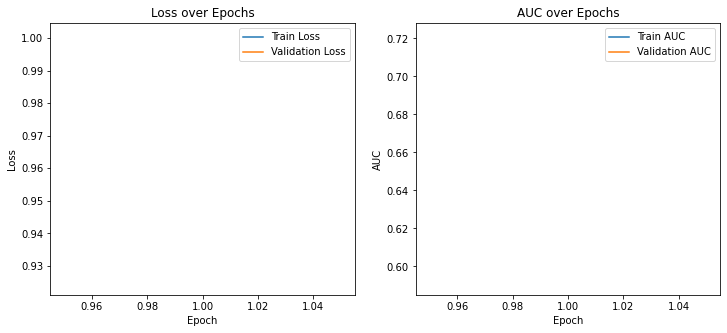

Validation: 100%|██████████| 236/236 [00:09<00:00, 24.67it/s, loss=1.53]  


Epoch [2/50], Train Loss: 0.9439, Train RIG: -663.22, Train Acc: 0.9731, Train AUC: 0.6541, Train Precision: 0.1429, Train Recall: 0.0001, Train F1: 0.0002, Train AP: 0.0963, Val Loss: 0.9126, Val RIG: -632.78, Val Acc: 0.9729, Val AUC: 0.7296, Val Precision: 0.3333, Val Recall: 0.0006, Val F1: 0.0012, Val AP: 0.1504


Validation: 100%|██████████| 236/236 [00:09<00:00, 24.72it/s, loss=1.55]  
/home/jupyter-hoc_project/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [3/50], Train Loss: 0.9302, Train RIG: -652.17, Train Acc: 0.9732, Train AUC: 0.6729, Train Precision: 0.5344, Train Recall: 0.0182, Train F1: 0.0353, Train AP: 0.1185, Val Loss: 0.8945, Val RIG: -618.24, Val Acc: 0.9729, Val AUC: 0.7375, Val Precision: 0.0000, Val Recall: 0.0000, Val F1: 0.0000, Val AP: 0.1497


Validation: 100%|██████████| 236/236 [00:09<00:00, 24.62it/s, loss=1.49]  
/home/jupyter-hoc_project/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [4/50], Train Loss: 0.9211, Train RIG: -644.85, Train Acc: 0.9731, Train AUC: 0.6829, Train Precision: 0.4748, Train Recall: 0.0222, Train F1: 0.0424, Train AP: 0.1235, Val Loss: 0.8850, Val RIG: -610.60, Val Acc: 0.9729, Val AUC: 0.7392, Val Precision: 0.0000, Val Recall: 0.0000, Val F1: 0.0000, Val AP: 0.1576


Validation: 100%|██████████| 236/236 [00:09<00:00, 24.60it/s, loss=1.47]  


Epoch [5/50], Train Loss: 0.9150, Train RIG: -639.92, Train Acc: 0.9734, Train AUC: 0.6873, Train Precision: 0.5619, Train Recall: 0.0406, Train F1: 0.0758, Train AP: 0.1364, Val Loss: 0.8831, Val RIG: -609.11, Val Acc: 0.9730, Val AUC: 0.7356, Val Precision: 0.5098, Val Recall: 0.1274, Val F1: 0.2038, Val AP: 0.1603


Validation: 100%|██████████| 236/236 [00:10<00:00, 22.73it/s, loss=1.49] 


Epoch [6/50], Train Loss: 0.9097, Train RIG: -635.64, Train Acc: 0.9733, Train AUC: 0.6892, Train Precision: 0.5368, Train Recall: 0.0580, Train F1: 0.1047, Train AP: 0.1417, Val Loss: 0.9029, Val RIG: -624.98, Val Acc: 0.9735, Val AUC: 0.7404, Val Precision: 0.6393, Val Recall: 0.0478, Val F1: 0.0889, Val AP: 0.1798


Validation: 100%|██████████| 236/236 [00:09<00:00, 25.05it/s, loss=1.48]  


Epoch [7/50], Train Loss: 0.9019, Train RIG: -629.31, Train Acc: 0.9736, Train AUC: 0.7002, Train Precision: 0.5729, Train Recall: 0.0616, Train F1: 0.1112, Train AP: 0.1510, Val Loss: 0.8785, Val RIG: -605.41, Val Acc: 0.9729, Val AUC: 0.7409, Val Precision: 0.5000, Val Recall: 0.0024, Val F1: 0.0049, Val AP: 0.1736


Validation: 100%|██████████| 236/236 [00:09<00:00, 24.80it/s, loss=1.46] 


Epoch [8/50], Train Loss: 0.8989, Train RIG: -626.91, Train Acc: 0.9738, Train AUC: 0.7008, Train Precision: 0.6056, Train Recall: 0.0696, Train F1: 0.1249, Train AP: 0.1601, Val Loss: 0.8733, Val RIG: -601.21, Val Acc: 0.9741, Val AUC: 0.7363, Val Precision: 0.6381, Val Recall: 0.1004, Val F1: 0.1735, Val AP: 0.1997


Validation: 100%|██████████| 236/236 [00:09<00:00, 24.74it/s, loss=1.58]  


Epoch [9/50], Train Loss: 0.8933, Train RIG: -622.38, Train Acc: 0.9739, Train AUC: 0.7049, Train Precision: 0.6154, Train Recall: 0.0806, Train F1: 0.1425, Train AP: 0.1683, Val Loss: 0.8688, Val RIG: -597.63, Val Acc: 0.9739, Val AUC: 0.7419, Val Precision: 0.7059, Val Recall: 0.0661, Val F1: 0.1209, Val AP: 0.2027


Validation: 100%|██████████| 236/236 [00:09<00:00, 24.71it/s, loss=1.48]  


Epoch [10/50], Train Loss: 0.8891, Train RIG: -618.93, Train Acc: 0.9742, Train AUC: 0.7103, Train Precision: 0.6336, Train Recall: 0.0972, Train F1: 0.1685, Train AP: 0.1702, Val Loss: 0.8752, Val RIG: -602.73, Val Acc: 0.9740, Val AUC: 0.7395, Val Precision: 0.5894, Val Recall: 0.1292, Val F1: 0.2120, Val AP: 0.2018


Validation: 100%|██████████| 236/236 [00:09<00:00, 25.02it/s, loss=1.58]  


Epoch [11/50], Train Loss: 0.8856, Train RIG: -616.15, Train Acc: 0.9743, Train AUC: 0.7125, Train Precision: 0.6407, Train Recall: 0.0984, Train F1: 0.1706, Train AP: 0.1762, Val Loss: 0.8807, Val RIG: -607.14, Val Acc: 0.9742, Val AUC: 0.7384, Val Precision: 0.7158, Val Recall: 0.0802, Val F1: 0.1443, Val AP: 0.2151


Validation: 100%|██████████| 236/236 [00:09<00:00, 25.29it/s, loss=1.4]   


Epoch [12/50], Train Loss: 0.8821, Train RIG: -613.28, Train Acc: 0.9745, Train AUC: 0.7165, Train Precision: 0.6682, Train Recall: 0.0985, Train F1: 0.1717, Train AP: 0.1786, Val Loss: 0.8786, Val RIG: -605.51, Val Acc: 0.9737, Val AUC: 0.7392, Val Precision: 0.5513, Val Recall: 0.1580, Val F1: 0.2456, Val AP: 0.1984


Validation: 100%|██████████| 236/236 [00:09<00:00, 25.08it/s, loss=1.54]  


Epoch    13: reducing learning rate of group 0 to 5.0000e-05.
Epoch [13/50], Train Loss: 0.8816, Train RIG: -612.92, Train Acc: 0.9743, Train AUC: 0.7165, Train Precision: 0.6248, Train Recall: 0.1130, Train F1: 0.1913, Train AP: 0.1777, Val Loss: 0.8692, Val RIG: -597.96, Val Acc: 0.9737, Val AUC: 0.7369, Val Precision: 0.5511, Val Recall: 0.1586, Val F1: 0.2463, Val AP: 0.2025


Validation: 100%|██████████| 236/236 [00:09<00:00, 25.10it/s, loss=1.51]  


Epoch [14/50], Train Loss: 0.8715, Train RIG: -604.70, Train Acc: 0.9747, Train AUC: 0.7263, Train Precision: 0.6777, Train Recall: 0.1142, Train F1: 0.1954, Train AP: 0.1919, Val Loss: 0.8640, Val RIG: -593.75, Val Acc: 0.9745, Val AUC: 0.7380, Val Precision: 0.7196, Val Recall: 0.0943, Val F1: 0.1668, Val AP: 0.2214


Validation: 100%|██████████| 236/236 [00:09<00:00, 24.96it/s, loss=1.59]  


Epoch [15/50], Train Loss: 0.8665, Train RIG: -600.64, Train Acc: 0.9749, Train AUC: 0.7303, Train Precision: 0.7170, Train Recall: 0.1100, Train F1: 0.1908, Train AP: 0.2037, Val Loss: 0.8788, Val RIG: -605.68, Val Acc: 0.9738, Val AUC: 0.7354, Val Precision: 0.5546, Val Recall: 0.1617, Val F1: 0.2504, Val AP: 0.2074


Validation: 100%|██████████| 236/236 [00:09<00:00, 24.61it/s, loss=1.57]  


Epoch [16/50], Train Loss: 0.8640, Train RIG: -598.67, Train Acc: 0.9750, Train AUC: 0.7310, Train Precision: 0.7145, Train Recall: 0.1160, Train F1: 0.1996, Train AP: 0.2107, Val Loss: 0.8614, Val RIG: -591.71, Val Acc: 0.9747, Val AUC: 0.7369, Val Precision: 0.6596, Val Recall: 0.1341, Val F1: 0.2229, Val AP: 0.2309


Validation: 100%|██████████| 236/236 [00:09<00:00, 24.83it/s, loss=1.51]  


Epoch    17: reducing learning rate of group 0 to 2.5000e-05.
Epoch [17/50], Train Loss: 0.8594, Train RIG: -594.91, Train Acc: 0.9751, Train AUC: 0.7348, Train Precision: 0.7289, Train Recall: 0.1150, Train F1: 0.1986, Train AP: 0.2168, Val Loss: 0.8622, Val RIG: -592.30, Val Acc: 0.9747, Val AUC: 0.7335, Val Precision: 0.6847, Val Recall: 0.1237, Val F1: 0.2095, Val AP: 0.2317


Validation: 100%|██████████| 236/236 [00:09<00:00, 24.82it/s, loss=1.54]  


Epoch [18/50], Train Loss: 0.8553, Train RIG: -591.60, Train Acc: 0.9752, Train AUC: 0.7378, Train Precision: 0.7134, Train Recall: 0.1265, Train F1: 0.2149, Train AP: 0.2236, Val Loss: 0.8636, Val RIG: -593.47, Val Acc: 0.9747, Val AUC: 0.7342, Val Precision: 0.6510, Val Recall: 0.1439, Val F1: 0.2357, Val AP: 0.2356


Validation: 100%|██████████| 236/236 [00:09<00:00, 24.74it/s, loss=1.66]  


Epoch [19/50], Train Loss: 0.8493, Train RIG: -586.77, Train Acc: 0.9754, Train AUC: 0.7432, Train Precision: 0.7521, Train Recall: 0.1277, Train F1: 0.2184, Train AP: 0.2322, Val Loss: 0.8733, Val RIG: -601.20, Val Acc: 0.9747, Val AUC: 0.7329, Val Precision: 0.6646, Val Recall: 0.1310, Val F1: 0.2189, Val AP: 0.2312


Validation: 100%|██████████| 236/236 [00:09<00:00, 24.97it/s, loss=1.58]  


Epoch [20/50], Train Loss: 0.8473, Train RIG: -585.14, Train Acc: 0.9754, Train AUC: 0.7445, Train Precision: 0.7394, Train Recall: 0.1312, Train F1: 0.2229, Train AP: 0.2354, Val Loss: 0.8698, Val RIG: -598.43, Val Acc: 0.9743, Val AUC: 0.7328, Val Precision: 0.5995, Val Recall: 0.1549, Val F1: 0.2462, Val AP: 0.2277


Validation: 100%|██████████| 236/236 [00:09<00:00, 24.71it/s, loss=1.59]  


Epoch    21: reducing learning rate of group 0 to 1.2500e-05.
Epoch [21/50], Train Loss: 0.8465, Train RIG: -584.50, Train Acc: 0.9755, Train AUC: 0.7449, Train Precision: 0.7548, Train Recall: 0.1278, Train F1: 0.2186, Train AP: 0.2354, Val Loss: 0.8659, Val RIG: -595.27, Val Acc: 0.9746, Val AUC: 0.7309, Val Precision: 0.6564, Val Recall: 0.1310, Val F1: 0.2185, Val AP: 0.2320


Validation: 100%|██████████| 236/236 [00:09<00:00, 23.94it/s, loss=1.67] 


Epoch [22/50], Train Loss: 0.8410, Train RIG: -580.05, Train Acc: 0.9755, Train AUC: 0.7496, Train Precision: 0.7472, Train Recall: 0.1350, Train F1: 0.2287, Train AP: 0.2425, Val Loss: 0.8770, Val RIG: -604.23, Val Acc: 0.9744, Val AUC: 0.7314, Val Precision: 0.6220, Val Recall: 0.1421, Val F1: 0.2313, Val AP: 0.2304


Validation: 100%|██████████| 236/236 [00:10<00:00, 23.15it/s, loss=1.63]  


Epoch [23/50], Train Loss: 0.8403, Train RIG: -579.48, Train Acc: 0.9755, Train AUC: 0.7507, Train Precision: 0.7442, Train Recall: 0.1355, Train F1: 0.2292, Train AP: 0.2440, Val Loss: 0.8746, Val RIG: -602.26, Val Acc: 0.9744, Val AUC: 0.7284, Val Precision: 0.6322, Val Recall: 0.1347, Val F1: 0.2221, Val AP: 0.2257


Validation: 100%|██████████| 236/236 [00:09<00:00, 24.28it/s, loss=1.64]  


Epoch [24/50], Train Loss: 0.8397, Train RIG: -579.01, Train Acc: 0.9756, Train AUC: 0.7512, Train Precision: 0.7680, Train Recall: 0.1301, Train F1: 0.2225, Train AP: 0.2460, Val Loss: 0.8769, Val RIG: -604.14, Val Acc: 0.9743, Val AUC: 0.7263, Val Precision: 0.6107, Val Recall: 0.1470, Val F1: 0.2369, Val AP: 0.2288


Validation: 100%|██████████| 236/236 [00:09<00:00, 24.45it/s, loss=1.65]  


Epoch    25: reducing learning rate of group 0 to 6.2500e-06.
Epoch [25/50], Train Loss: 0.8384, Train RIG: -577.99, Train Acc: 0.9756, Train AUC: 0.7506, Train Precision: 0.7464, Train Recall: 0.1390, Train F1: 0.2344, Train AP: 0.2475, Val Loss: 0.8760, Val RIG: -603.44, Val Acc: 0.9744, Val AUC: 0.7263, Val Precision: 0.6260, Val Recall: 0.1415, Val F1: 0.2308, Val AP: 0.2306


Validation: 100%|██████████| 236/236 [00:09<00:00, 24.63it/s, loss=1.65]  


Epoch [26/50], Train Loss: 0.8355, Train RIG: -575.58, Train Acc: 0.9756, Train AUC: 0.7545, Train Precision: 0.7408, Train Recall: 0.1417, Train F1: 0.2379, Train AP: 0.2502, Val Loss: 0.8773, Val RIG: -604.44, Val Acc: 0.9742, Val AUC: 0.7260, Val Precision: 0.5960, Val Recall: 0.1464, Val F1: 0.2350, Val AP: 0.2295


Epoch 27/50:  89%|████████▉ | 1155/1299 [00:47<00:05, 24.25it/s, loss=0.567]


KeyboardInterrupt: 

In [35]:
# Code Block 2: Training Code with tqdm and Dynamic Plotting

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
import torch.nn.functional as F
import numpy as np
import pickle
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score
import multiprocessing
import matplotlib.pyplot as plt
from tqdm import tqdm  # For progress bars
from sklearn.metrics import log_loss
# Enhanced Sequence Model
class EnhancedSequenceModel(nn.Module):
    def __init__(self, numerical_features, categorical_features, embedding_dims, label_encoders):
        super(EnhancedSequenceModel, self).__init__()
        self.numerical_features = numerical_features
        self.categorical_features = categorical_features

        # Embedding layers
        self.embeddings = nn.ModuleDict({
            col: nn.Embedding(
                num_embeddings=len(label_encoders[col].classes_) + 1,
                embedding_dim=embedding_dims[col],
                padding_idx=0,
            )
            for col in categorical_features
        })

        total_embed_dim = sum(embedding.embedding_dim for embedding in self.embeddings.values())
        input_dim = total_embed_dim + len(numerical_features)

        # LSTM layer with layer normalization
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=256,
            num_layers=2,
            batch_first=True,
            dropout=0.3,
            bidirectional=True,
        )
        self.layer_norm = nn.LayerNorm(256 * 2)

        # Multi-head attention
        self.multihead_attn = nn.MultiheadAttention(embed_dim=256 * 2, num_heads=4, dropout=0.3)

        # Fully connected layers
        self.fc1 = nn.Linear(256 * 2, 128)
        self.fc2 = nn.Linear(128, 1)
        self.dropout = nn.Dropout(0.3)

    def forward(self, X_num, X_cat):
        embeddings = [self.embeddings[col](X_cat[col]) for col in self.categorical_features]
        x_cat = torch.cat(embeddings, dim=-1)
        x = torch.cat([X_num, x_cat], dim=-1)

        # LSTM
        x, _ = self.lstm(x)
        x = self.layer_norm(x)

        # Multi-head attention
        attn_output, _ = self.multihead_attn(x, x, x)
        x = attn_output.mean(dim=1)

        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        logits = self.fc2(x)

        return logits.squeeze()

# Load the processed data
with open('processed_data_pytorch.pkl', 'rb') as f:
    processed_data = pickle.load(f)

X_train_numerical = processed_data['X_train_numerical']
X_train_categorical = processed_data['X_train_categorical']
y_train = processed_data['y_train']
X_test_numerical = processed_data['X_test_numerical']
X_test_categorical = processed_data['X_test_categorical']
y_test = processed_data['y_test']
class_weight_dict = processed_data['class_weight_dict']
max_seq_length = processed_data['max_seq_length']
numerical_features = processed_data['numerical_features']
categorical_features = processed_data['categorical_features']
label_encoders = processed_data['label_encoders']

print("Processed data loaded successfully.")

# Custom Dataset Class with NaN Checks and Normalization
class UserSequenceDataset(Dataset):
    def __init__(self, X_numerical, X_categorical, y):
        # Ensure inputs are cleaned and normalized before tensor conversion
        X_numerical = np.nan_to_num(X_numerical, nan=0.0)  # Replace NaNs in numerical data with 0
        for col, values in X_categorical.items():
            X_categorical[col] = np.nan_to_num(values, nan=0)  # Replace NaNs in categorical data with 0
        y = np.nan_to_num(y, nan=0.0)  # Replace NaNs in target values with 0

        # Convert to tensors
        self.X_numerical = torch.tensor(X_numerical, dtype=torch.float32)
        self.X_categorical = {col: torch.tensor(values, dtype=torch.long) for col, values in X_categorical.items()}
        self.y = torch.tensor(y, dtype=torch.float32)

        self.num_samples = self.X_numerical.shape[0]

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        X_num = self.X_numerical[idx]
        X_cat = {col: values[idx] for col, values in self.X_categorical.items()}
        y = self.y[idx]
        return (X_num, X_cat), y


# Prepare datasets with normalization and cleaning
train_dataset = UserSequenceDataset(X_train_numerical, X_train_categorical, y_train)
test_dataset = UserSequenceDataset(X_test_numerical, X_test_categorical, y_test)

# Dynamically determine the number of workers for data loading
num_workers = 10

# Set batch size
batch_size = 256

# Data loaders without sampling
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)

# Initialize the model with improved initialization for LSTM
embedding_dims = {
    col: int(min(50, np.ceil((len(label_encoders[col].classes_) + 1) / 2)))
    for col in categorical_features
}

#model = SequenceModel(numerical_features, categorical_features, embedding_dims, label_encoders)
model = EnhancedSequenceModel(numerical_features, categorical_features, embedding_dims, label_encoders)


# Improved weight initialization for LSTM and Linear layers
def initialize_weights(module):
    if isinstance(module, nn.LSTM):
        for name, param in module.named_parameters():
            if 'weight' in name:
                nn.init.xavier_uniform_(param)  # Use uniform Xavier initialization
            elif 'bias' in name:
                nn.init.zeros_(param)  # Initialize biases to 0
    elif isinstance(module, nn.Linear):
        nn.init.xavier_uniform_(module.weight)
        if module.bias is not None:
            nn.init.zeros_(module.bias)

#model.apply(initialize_weights)

# Move model to device (GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Define AUCMarginLoss for AUC optimization
class AUCMarginLoss(nn.Module):
    def __init__(self, margin=1.0):
        super(AUCMarginLoss, self).__init__()
        self.margin = margin

    def forward(self, logits, targets):
        # Separate positive and negative examples
        pos_mask = targets == 1
        neg_mask = targets == 0

        pos_scores = logits[pos_mask]
        neg_scores = logits[neg_mask]

        if len(pos_scores) == 0 or len(neg_scores) == 0:  # Avoid empty slices
            return torch.tensor(0.0, requires_grad=True, device=logits.device)

        # Pairwise margin ranking
        pairwise_loss = self.margin - (pos_scores[:, None] - neg_scores[None, :])
        pairwise_loss = torch.clamp(pairwise_loss, min=0)

        return pairwise_loss.mean()

#criterion = AUCMarginLoss(margin=1.0)


class WeightedAUCMarginLoss(nn.Module):
    def __init__(self, margin=1.0, pos_weight=1.0):
        """
        AUC Margin Loss with weights for positive samples.
        Args:
            margin (float): Margin for pairwise ranking.
            pos_weight (float): Weight for positive samples.
        """
        super(WeightedAUCMarginLoss, self).__init__()
        self.margin = margin
        self.pos_weight = pos_weight

    def forward(self, logits, targets):
        """
        Compute the Weighted AUC Margin Loss.
        Args:
            logits (torch.Tensor): Model predictions (raw logits).
            targets (torch.Tensor): Binary targets (0 or 1).
        Returns:
            torch.Tensor: Weighted pairwise AUC loss.
        """
        pos_mask = targets == 1
        neg_mask = targets == 0

        pos_scores = logits[pos_mask]
        neg_scores = logits[neg_mask]

        if len(pos_scores) == 0 or len(neg_scores) == 0:
            return torch.tensor(0.0, requires_grad=True, device=logits.device)

        # Pairwise loss with weighting
        pairwise_loss = self.margin - (pos_scores[:, None] - neg_scores[None, :])
        pairwise_loss = torch.clamp(pairwise_loss, min=0)

        # Apply weights for positive samples
        weights = self.pos_weight * pos_mask.float()[pos_mask]
        return (pairwise_loss.mean(dim=1) * weights).mean()


# Set criterion
#criterion = WeightedAUCMarginLoss(margin=1.0, pos_weight=5.0)

#wirks very well for high recall creteria
class SmoothAUCLoss(nn.Module):
    def __init__(self, temperature=1.0):
        """
        Smooth AUC Loss using softmax approximation.
        Args:
            temperature (float): Temperature for smoothing. Lower values increase sharpness.
        """
        super(SmoothAUCLoss, self).__init__()
        self.temperature = temperature

    def forward(self, logits, targets):
        """
        Compute the Smooth AUC Loss.
        Args:
            logits (torch.Tensor): Model predictions (raw logits).
            targets (torch.Tensor): Binary targets (0 or 1).
        Returns:
            torch.Tensor: Smooth pairwise AUC loss.
        """
        pos_mask = targets == 1
        neg_mask = targets == 0

        pos_scores = logits[pos_mask]
        neg_scores = logits[neg_mask]

        if len(pos_scores) == 0 or len(neg_scores) == 0:
            return torch.tensor(0.0, requires_grad=True, device=logits.device)

        # Compute pairwise scores with smoothing
        pairwise_diff = pos_scores[:, None] - neg_scores[None, :]
        smooth_loss = torch.log(1 + torch.exp(-pairwise_diff / self.temperature))

        return smooth_loss.mean()


# Set criterion
#criterion = SmoothAUCLoss(temperature=0.1)


# works very well for precision
class HybridAUCLoss(nn.Module):
    def __init__(self, margin=1.0, bce_weight=0.5):
        """
        Hybrid AUC Loss combining pairwise AUC and BCE.
        Args:
            margin (float): Margin for pairwise ranking.
            bce_weight (float): Weight for BCE component in the loss.
        """
        super(HybridAUCLoss, self).__init__()
        self.margin = margin
        self.bce_weight = bce_weight
        self.bce_loss = nn.BCEWithLogitsLoss()

    def forward(self, logits, targets):
        """
        Compute the Hybrid AUC Loss.
        Args:
            logits (torch.Tensor): Model predictions (raw logits).
            targets (torch.Tensor): Binary targets (0 or 1).
        Returns:
            torch.Tensor: Combined AUC and BCE loss.
        """
        # AUC margin loss
        pos_mask = targets == 1
        neg_mask = targets == 0

        pos_scores = logits[pos_mask]
        neg_scores = logits[neg_mask]

        if len(pos_scores) == 0 or len(neg_scores) == 0:
            auc_loss = torch.tensor(0.0, requires_grad=True, device=logits.device)
        else:
            pairwise_loss = self.margin - (pos_scores[:, None] - neg_scores[None, :])
            pairwise_loss = torch.clamp(pairwise_loss, min=0)
            auc_loss = pairwise_loss.mean()

        # BCE loss
        bce_loss = self.bce_loss(logits, targets)

        # Combine losses
        return auc_loss + self.bce_weight * bce_loss


# Set criterion
#criterion = HybridAUCLoss(margin=1.0, bce_weight=0.5)


class RIGOptimizedLoss(nn.Module):
    def __init__(self, baseline_loss):
        """
        Loss function to optimize Relative Information Gain (RIG).
        Args:
            baseline_loss (float): Precomputed baseline log loss (\mathcal{L}(\bar{Y}, Y)).
        """
        super(RIGOptimizedLoss, self).__init__()
        self.baseline_loss = baseline_loss  # Baseline log loss
        self.bce_loss = nn.BCEWithLogitsLoss()  # Binary Cross-Entropy as base loss

    def forward(self, logits, targets):
        """
        Compute the RIG-Optimized Loss.
        Args:
            logits (torch.Tensor): Model predictions (raw logits).
            targets (torch.Tensor): Binary targets (0 or 1).

        Returns:
            torch.Tensor: Scaled BCE loss representing the model's contribution to RIG.
        """
        # Compute BCE loss
        loss = self.bce_loss(logits, targets)

        # Scale loss by the baseline loss to align with RIG
        rig_loss = loss / self.baseline_loss

        return rig_loss

baseline_ctr = y_train.mean()
baseline_loss = -(
    baseline_ctr * np.log(baseline_ctr + 1e-9) + (1 - baseline_ctr) * np.log(1 - baseline_ctr + 1e-9)
)

criterion = RIGOptimizedLoss(baseline_loss=baseline_loss)


# Define optimizer with weight decay for regularization
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)

# Learning rate scheduler for dynamic adaptation
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=3, verbose=True)

# Gradient clipping for LSTM stability
def clip_gradients():
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=5.0)  # Clip gradients to a higher threshold


# Calculate Baseline CTR and Log Loss
train_baseline_ctr = np.mean(y_train)
test_baseline_ctr = np.mean(y_test)

baseline_train_loss = -(
    train_baseline_ctr * np.log(train_baseline_ctr + 1e-9) +
    (1 - train_baseline_ctr) * np.log(1 - train_baseline_ctr + 1e-9)
)
baseline_val_loss = -(
    test_baseline_ctr * np.log(test_baseline_ctr + 1e-9) +
    (1 - test_baseline_ctr) * np.log(1 - test_baseline_ctr + 1e-9)
)

# Initialize lists for dynamic plotting
epochs_list = []
train_loss_list = []
val_loss_list = []
train_auc_list = []
val_auc_list = []
train_rig_list = []
val_rig_list = []

# Setup dynamic plotting
plt.ion()
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Training loop with tqdm and dynamic plotting
num_epochs = 50
best_val_auc = 0.0

for epoch in range(num_epochs):
    model.train()
    train_losses = []
    y_true_train = []
    y_pred_train = []
    
    # Progress bar for training
    train_loader_tqdm = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', position=0, leave=True)
    
    for (X_num_batch, X_cat_batch), y_batch in train_loader_tqdm:
        # Move data to device
        X_num_batch = X_num_batch.to(device)
        X_cat_batch = {col: X_cat_batch[col].to(device) for col in X_cat_batch}
        y_batch = y_batch.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        logits = model(X_num_batch, X_cat_batch)
        loss = criterion(logits, y_batch)
        
        # Backward and optimize
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        
        # Record loss
        train_losses.append(loss.item())
        
        # Collect predictions for metrics
        y_true_train.extend(y_batch.detach().cpu().numpy())
        y_pred_train.extend(torch.sigmoid(logits.detach()).cpu().numpy())
        
        # Update progress bar
        train_loader_tqdm.set_postfix(loss=loss.item())
    
    # Calculate metrics
    train_loss = np.mean(train_losses)
    train_rig = (1 - (train_loss / baseline_train_loss)) * 100
    train_accuracy = accuracy_score(y_true_train, np.round(y_pred_train))
    train_auc = roc_auc_score(y_true_train, y_pred_train)
    train_precision = precision_score(y_true_train, np.round(y_pred_train), average="binary")
    train_recall = recall_score(y_true_train, np.round(y_pred_train), average="binary")
    train_f1 = f1_score(y_true_train, np.round(y_pred_train), average="binary")
    train_ap = average_precision_score(y_true_train, y_pred_train)

    # Validation
    model.eval()
    with torch.no_grad():
        val_losses = []
        y_true_val = []
        y_pred_val = []
        
        # Progress bar for validation
        val_loader_tqdm = tqdm(test_loader, desc='Validation', position=0, leave=True)
        
        for (X_num_batch, X_cat_batch), y_batch in val_loader_tqdm:
            X_num_batch = X_num_batch.to(device)
            X_cat_batch = {col: X_cat_batch[col].to(device) for col in X_cat_batch}
            y_batch = y_batch.to(device)
            
            logits = model(X_num_batch, X_cat_batch)
            loss = criterion(logits, y_batch)
            val_losses.append(loss.item())
            
            y_true_val.extend(y_batch.detach().cpu().numpy())
            y_pred_val.extend(torch.sigmoid(logits.detach()).cpu().numpy())
            
            # Update progress bar
            val_loader_tqdm.set_postfix(loss=loss.item())
        
        val_loss = np.mean(val_losses)
        val_rig = (1 - (val_loss / baseline_val_loss)) * 100
        val_accuracy = accuracy_score(y_true_val, np.round(y_pred_val))
        val_auc = roc_auc_score(y_true_val, y_pred_val)
        val_precision = precision_score(y_true_val, np.round(y_pred_val), average="binary")
        val_recall = recall_score(y_true_val, np.round(y_pred_val), average="binary")
        val_f1 = f1_score(y_true_val, np.round(y_pred_val), average="binary")
        val_ap = average_precision_score(y_true_val, y_pred_val)
        
        # Step the scheduler
        scheduler.step(val_auc)
        
        # Save the model if validation AUC improves
        if val_auc > best_val_auc:
            best_val_auc = val_auc
            torch.save(model.state_dict(), 'best_model.pth')
    
    # Update lists for plotting
    epochs_list.append(epoch + 1)
    train_loss_list.append(train_loss)
    val_loss_list.append(val_loss)
    train_auc_list.append(train_auc)
    val_auc_list.append(val_auc)
    train_rig_list.append(train_rig)
    val_rig_list.append(val_rig)
    
    # Plotting after each epoch
    plt.figure(figsize=(12, 5))
    # Loss Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs_list, train_loss_list, label='Train Loss')
    plt.plot(epochs_list, val_loss_list, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()
    
    # AUC Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs_list, train_auc_list, label='Train AUC')
    plt.plot(epochs_list, val_auc_list, label='Validation AUC')
    plt.xlabel('Epoch')
    plt.ylabel('AUC')
    plt.title('AUC over Epochs')
    plt.legend()
    
    plt.tight_layout()
    plt.close()
    
    # Print epoch summary
    print(f'Epoch [{epoch+1}/{num_epochs}], '
          f'Train Loss: {train_loss:.4f}, Train RIG: {train_rig:.2f}, Train Acc: {train_accuracy:.4f}, Train AUC: {train_auc:.4f}, '
          f'Train Precision: {train_precision:.4f}, Train Recall: {train_recall:.4f}, Train F1: {train_f1:.4f}, Train AP: {train_ap:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val RIG: {val_rig:.2f}, Val Acc: {val_accuracy:.4f}, Val AUC: {val_auc:.4f}, '
          f'Val Precision: {val_precision:.4f}, Val Recall: {val_recall:.4f}, Val F1: {val_f1:.4f}, Val AP: {val_ap:.4f}')

    # Dynamic plotting updates
    axs[0].cla()
    axs[1].cla()
    axs[0].plot(epochs_list, train_loss_list, label='Train Loss')
    axs[0].plot(epochs_list, val_loss_list, label='Validation Loss')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Loss')
    axs[0].set_title('Loss over Epochs')
    axs[0].legend()
    axs[1].plot(epochs_list, train_auc_list, label='Train AUC')
    axs[1].plot(epochs_list, val_auc_list, label='Validation AUC')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('AUC')
    axs[1].set_title('AUC over Epochs')
    axs[1].legend()
    plt.pause(0.01)
    
# Turn off interactive plotting
plt.ioff()
plt.show()

# Transformer

Processed data loaded successfully.


Validation: 100%|██████████| 236/236 [00:06<00:00, 35.18it/s, loss=0.827]  


Epoch [1/50], Train Loss: 0.8666, Train RIG: -600.73, Train Acc: 0.6752, Train AUC: 0.5970, Train Precision: 0.0378, Train Recall: 0.4528, Train F1: 0.0697, Train AP: 0.0468, Val Loss: 0.7027, Val RIG: -464.25, Val Acc: 0.6874, Val AUC: 0.6950, Val Precision: 0.0501, Val Recall: 0.5867, Val F1: 0.0924, Val AP: 0.1095


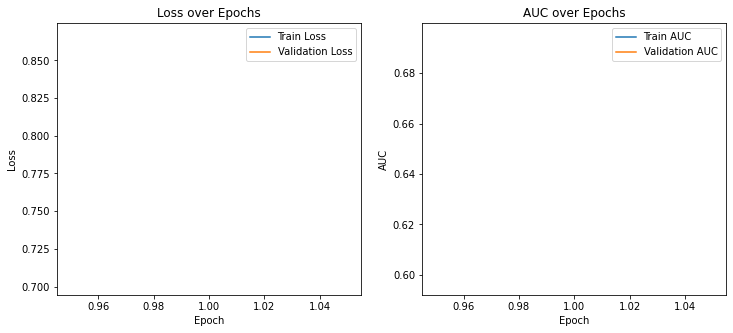

Validation: 100%|██████████| 236/236 [00:06<00:00, 34.86it/s, loss=0.611]  


Epoch [2/50], Train Loss: 0.7515, Train RIG: -507.67, Train Acc: 0.7451, Train AUC: 0.6556, Train Precision: 0.0488, Train Recall: 0.4591, Train F1: 0.0882, Train AP: 0.0712, Val Loss: 0.6799, Val RIG: -445.93, Val Acc: 0.8227, Val AUC: 0.7015, Val Precision: 0.0694, Val Recall: 0.4464, Val F1: 0.1201, Val AP: 0.1150


Validation: 100%|██████████| 236/236 [00:06<00:00, 34.78it/s, loss=0.601]  


Epoch [3/50], Train Loss: 0.7268, Train RIG: -487.70, Train Acc: 0.7627, Train AUC: 0.6684, Train Precision: 0.0529, Train Recall: 0.4638, Train F1: 0.0950, Train AP: 0.0816, Val Loss: 0.7065, Val RIG: -467.32, Val Acc: 0.7989, Val AUC: 0.6936, Val Precision: 0.0640, Val Recall: 0.4709, Val F1: 0.1126, Val AP: 0.1348


Validation: 100%|██████████| 236/236 [00:07<00:00, 32.59it/s, loss=0.692]  


Epoch [4/50], Train Loss: 0.7116, Train RIG: -475.40, Train Acc: 0.7209, Train AUC: 0.6780, Train Precision: 0.0498, Train Recall: 0.5194, Train F1: 0.0909, Train AP: 0.0841, Val Loss: 0.6799, Val RIG: -445.95, Val Acc: 0.8327, Val AUC: 0.7010, Val Precision: 0.0740, Val Recall: 0.4495, Val F1: 0.1271, Val AP: 0.1228


Validation: 100%|██████████| 236/236 [00:06<00:00, 35.27it/s, loss=0.661]  


Epoch [5/50], Train Loss: 0.7097, Train RIG: -473.87, Train Acc: 0.7465, Train AUC: 0.6804, Train Precision: 0.0530, Train Recall: 0.5005, Train F1: 0.0959, Train AP: 0.0864, Val Loss: 0.6660, Val RIG: -434.81, Val Acc: 0.6686, Val AUC: 0.7065, Val Precision: 0.0490, Val Recall: 0.6099, Val F1: 0.0907, Val AP: 0.1337


Validation: 100%|██████████| 236/236 [00:06<00:00, 35.08it/s, loss=0.921] 


Epoch [6/50], Train Loss: 0.6975, Train RIG: -463.98, Train Acc: 0.7529, Train AUC: 0.6869, Train Precision: 0.0540, Train Recall: 0.4958, Train F1: 0.0973, Train AP: 0.0938, Val Loss: 0.6744, Val RIG: -441.53, Val Acc: 0.8236, Val AUC: 0.7050, Val Precision: 0.0712, Val Recall: 0.4568, Val F1: 0.1231, Val AP: 0.1349


Validation: 100%|██████████| 236/236 [00:06<00:00, 35.12it/s, loss=0.737] 


Epoch [7/50], Train Loss: 0.6859, Train RIG: -454.66, Train Acc: 0.7506, Train AUC: 0.6909, Train Precision: 0.0552, Train Recall: 0.5140, Train F1: 0.0997, Train AP: 0.0963, Val Loss: 0.7045, Val RIG: -465.72, Val Acc: 0.8125, Val AUC: 0.6936, Val Precision: 0.0660, Val Recall: 0.4501, Val F1: 0.1151, Val AP: 0.1320


Validation: 100%|██████████| 236/236 [00:06<00:00, 34.64it/s, loss=0.99]   


Epoch [8/50], Train Loss: 0.6826, Train RIG: -451.96, Train Acc: 0.8001, Train AUC: 0.6916, Train Precision: 0.0618, Train Recall: 0.4540, Train F1: 0.1088, Train AP: 0.0975, Val Loss: 0.6713, Val RIG: -439.00, Val Acc: 0.7864, Val AUC: 0.7071, Val Precision: 0.0645, Val Recall: 0.5095, Val F1: 0.1145, Val AP: 0.1409


Validation: 100%|██████████| 236/236 [00:06<00:00, 35.01it/s, loss=0.889]  


Epoch [9/50], Train Loss: 0.6734, Train RIG: -444.49, Train Acc: 0.8071, Train AUC: 0.6957, Train Precision: 0.0649, Train Recall: 0.4611, Train F1: 0.1138, Train AP: 0.1027, Val Loss: 0.6567, Val RIG: -427.32, Val Acc: 0.8567, Val AUC: 0.7101, Val Precision: 0.0834, Val Recall: 0.4287, Val F1: 0.1396, Val AP: 0.1420


Validation: 100%|██████████| 236/236 [00:06<00:00, 35.23it/s, loss=0.975]  


Epoch [10/50], Train Loss: 0.6701, Train RIG: -441.85, Train Acc: 0.8183, Train AUC: 0.7014, Train Precision: 0.0670, Train Recall: 0.4454, Train F1: 0.1164, Train AP: 0.1051, Val Loss: 0.6559, Val RIG: -426.64, Val Acc: 0.8464, Val AUC: 0.7130, Val Precision: 0.0808, Val Recall: 0.4501, Val F1: 0.1371, Val AP: 0.1432


Validation: 100%|██████████| 236/236 [00:06<00:00, 35.38it/s, loss=0.768] 


Epoch [11/50], Train Loss: 0.6664, Train RIG: -438.83, Train Acc: 0.7880, Train AUC: 0.7010, Train Precision: 0.0612, Train Recall: 0.4809, Train F1: 0.1086, Train AP: 0.1085, Val Loss: 0.6636, Val RIG: -432.85, Val Acc: 0.7151, Val AUC: 0.7139, Val Precision: 0.0539, Val Recall: 0.5750, Val F1: 0.0986, Val AP: 0.1435


Validation: 100%|██████████| 236/236 [00:06<00:00, 34.44it/s, loss=1.04]  


Epoch [12/50], Train Loss: 0.6654, Train RIG: -438.03, Train Acc: 0.8426, Train AUC: 0.7041, Train Precision: 0.0742, Train Recall: 0.4238, Train F1: 0.1264, Train AP: 0.1115, Val Loss: 0.6561, Val RIG: -426.83, Val Acc: 0.8653, Val AUC: 0.7176, Val Precision: 0.0897, Val Recall: 0.4336, Val F1: 0.1486, Val AP: 0.1503


Validation: 100%|██████████| 236/236 [00:06<00:00, 34.27it/s, loss=1.1]   


Epoch [13/50], Train Loss: 0.6578, Train RIG: -431.92, Train Acc: 0.8279, Train AUC: 0.7070, Train Precision: 0.0702, Train Recall: 0.4417, Train F1: 0.1212, Train AP: 0.1145, Val Loss: 0.6515, Val RIG: -423.17, Val Acc: 0.8262, Val AUC: 0.7163, Val Precision: 0.0750, Val Recall: 0.4776, Val F1: 0.1297, Val AP: 0.1548


Validation: 100%|██████████| 236/236 [00:06<00:00, 34.66it/s, loss=1.05]   


Epoch [14/50], Train Loss: 0.6506, Train RIG: -426.09, Train Acc: 0.7956, Train AUC: 0.7120, Train Precision: 0.0642, Train Recall: 0.4871, Train F1: 0.1135, Train AP: 0.1187, Val Loss: 0.6583, Val RIG: -428.62, Val Acc: 0.8108, Val AUC: 0.7175, Val Precision: 0.0719, Val Recall: 0.5021, Val F1: 0.1258, Val AP: 0.1526


Validation: 100%|██████████| 236/236 [00:06<00:00, 34.86it/s, loss=1.06]   


Epoch [15/50], Train Loss: 0.6449, Train RIG: -421.47, Train Acc: 0.7717, Train AUC: 0.7127, Train Precision: 0.0603, Train Recall: 0.5139, Train F1: 0.1079, Train AP: 0.1254, Val Loss: 0.6299, Val RIG: -405.83, Val Acc: 0.8173, Val AUC: 0.7242, Val Precision: 0.0747, Val Recall: 0.5040, Val F1: 0.1301, Val AP: 0.1614


Validation: 100%|██████████| 236/236 [00:06<00:00, 35.34it/s, loss=1.1]    


Epoch [16/50], Train Loss: 0.6396, Train RIG: -417.18, Train Acc: 0.7597, Train AUC: 0.7122, Train Precision: 0.0584, Train Recall: 0.5257, Train F1: 0.1052, Train AP: 0.1270, Val Loss: 0.6346, Val RIG: -409.56, Val Acc: 0.7878, Val AUC: 0.7282, Val Precision: 0.0676, Val Recall: 0.5334, Val F1: 0.1199, Val AP: 0.1638


Validation: 100%|██████████| 236/236 [00:06<00:00, 34.55it/s, loss=0.979]  


Epoch [17/50], Train Loss: 0.6401, Train RIG: -417.59, Train Acc: 0.7999, Train AUC: 0.7154, Train Precision: 0.0654, Train Recall: 0.4851, Train F1: 0.1152, Train AP: 0.1325, Val Loss: 0.6559, Val RIG: -426.63, Val Acc: 0.8164, Val AUC: 0.7180, Val Precision: 0.0715, Val Recall: 0.4819, Val F1: 0.1246, Val AP: 0.1622


Validation: 100%|██████████| 236/236 [00:06<00:00, 34.90it/s, loss=1.29]   


Epoch [18/50], Train Loss: 0.6321, Train RIG: -411.14, Train Acc: 0.7928, Train AUC: 0.7200, Train Precision: 0.0646, Train Recall: 0.4976, Train F1: 0.1143, Train AP: 0.1331, Val Loss: 0.6622, Val RIG: -431.74, Val Acc: 0.8092, Val AUC: 0.7207, Val Precision: 0.0710, Val Recall: 0.4997, Val F1: 0.1244, Val AP: 0.1622


Validation: 100%|██████████| 236/236 [00:07<00:00, 30.05it/s, loss=0.988]  


Epoch [19/50], Train Loss: 0.6305, Train RIG: -409.85, Train Acc: 0.7555, Train AUC: 0.7189, Train Precision: 0.0594, Train Recall: 0.5465, Train F1: 0.1072, Train AP: 0.1330, Val Loss: 0.6203, Val RIG: -398.05, Val Acc: 0.8077, Val AUC: 0.7271, Val Precision: 0.0723, Val Recall: 0.5150, Val F1: 0.1268, Val AP: 0.1660


Validation: 100%|██████████| 236/236 [00:06<00:00, 34.78it/s, loss=1.04]   


Epoch    20: reducing learning rate of group 0 to 5.0000e-05.
Epoch [20/50], Train Loss: 0.6260, Train RIG: -406.22, Train Acc: 0.7823, Train AUC: 0.7196, Train Precision: 0.0632, Train Recall: 0.5135, Train F1: 0.1125, Train AP: 0.1362, Val Loss: 0.6426, Val RIG: -415.97, Val Acc: 0.7867, Val AUC: 0.7236, Val Precision: 0.0669, Val Recall: 0.5309, Val F1: 0.1189, Val AP: 0.1682


Validation: 100%|██████████| 236/236 [00:06<00:00, 34.41it/s, loss=1.05]   


Epoch [21/50], Train Loss: 0.6080, Train RIG: -391.62, Train Acc: 0.7941, Train AUC: 0.7287, Train Precision: 0.0664, Train Recall: 0.5099, Train F1: 0.1174, Train AP: 0.1432, Val Loss: 0.6523, Val RIG: -423.82, Val Acc: 0.8179, Val AUC: 0.7178, Val Precision: 0.0723, Val Recall: 0.4832, Val F1: 0.1258, Val AP: 0.1665


Validation: 100%|██████████| 236/236 [00:06<00:00, 34.89it/s, loss=1.13]   


Epoch [22/50], Train Loss: 0.6064, Train RIG: -390.38, Train Acc: 0.8159, Train AUC: 0.7293, Train Precision: 0.0707, Train Recall: 0.4817, Train F1: 0.1233, Train AP: 0.1468, Val Loss: 0.6518, Val RIG: -423.38, Val Acc: 0.7683, Val AUC: 0.7208, Val Precision: 0.0634, Val Recall: 0.5475, Val F1: 0.1136, Val AP: 0.1678


Validation: 100%|██████████| 236/236 [00:06<00:00, 34.68it/s, loss=1.35]   


Epoch [23/50], Train Loss: 0.6105, Train RIG: -393.65, Train Acc: 0.7944, Train AUC: 0.7301, Train Precision: 0.0665, Train Recall: 0.5099, Train F1: 0.1176, Train AP: 0.1463, Val Loss: 0.6634, Val RIG: -432.69, Val Acc: 0.8222, Val AUC: 0.7181, Val Precision: 0.0737, Val Recall: 0.4801, Val F1: 0.1277, Val AP: 0.1668


Validation: 100%|██████████| 236/236 [00:06<00:00, 34.84it/s, loss=1.2]   


Epoch    24: reducing learning rate of group 0 to 2.5000e-05.
Epoch [24/50], Train Loss: 0.6068, Train RIG: -390.70, Train Acc: 0.8131, Train AUC: 0.7312, Train Precision: 0.0703, Train Recall: 0.4872, Train F1: 0.1228, Train AP: 0.1459, Val Loss: 0.6571, Val RIG: -427.63, Val Acc: 0.8428, Val AUC: 0.7147, Val Precision: 0.0810, Val Recall: 0.4636, Val F1: 0.1378, Val AP: 0.1627


Validation: 100%|██████████| 236/236 [00:06<00:00, 34.89it/s, loss=1.35]   


Epoch [25/50], Train Loss: 0.6059, Train RIG: -389.98, Train Acc: 0.7977, Train AUC: 0.7343, Train Precision: 0.0683, Train Recall: 0.5164, Train F1: 0.1206, Train AP: 0.1504, Val Loss: 0.6800, Val RIG: -446.00, Val Acc: 0.8279, Val AUC: 0.7122, Val Precision: 0.0749, Val Recall: 0.4709, Val F1: 0.1292, Val AP: 0.1677


Validation: 100%|██████████| 236/236 [00:06<00:00, 34.99it/s, loss=1.28]   


Epoch [26/50], Train Loss: 0.5991, Train RIG: -384.43, Train Acc: 0.7972, Train AUC: 0.7362, Train Precision: 0.0676, Train Recall: 0.5124, Train F1: 0.1195, Train AP: 0.1502, Val Loss: 0.6840, Val RIG: -449.20, Val Acc: 0.8111, Val AUC: 0.7128, Val Precision: 0.0697, Val Recall: 0.4832, Val F1: 0.1218, Val AP: 0.1658


Epoch 27/50:  11%|█         | 142/1299 [00:09<01:13, 15.69it/s, loss=0.594] 


KeyboardInterrupt: 

In [31]:
# Code Block 2: Training Code with tqdm and Dynamic Plotting

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
import torch.nn.functional as F
import numpy as np
import pickle
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score
import multiprocessing
import matplotlib.pyplot as plt
from tqdm import tqdm  # For progress bars
from sklearn.metrics import log_loss
import torch
import torch.nn as nn
import torch.nn.functional as F


class SequenceModel(nn.Module):
    def __init__(self, numerical_features, categorical_features, embedding_dims, label_encoders, num_heads=4, num_transformer_layers=2):
        super(SequenceModel, self).__init__()
        self.numerical_features = numerical_features
        self.categorical_features = categorical_features
        
        # Embedding layers for categorical features
        self.embeddings = nn.ModuleDict()
        for col in categorical_features:
            vocab_size = len(label_encoders[col].classes_) + 1  # +1 for padding index
            embed_dim = embedding_dims.get(col, 50)
            self.embeddings[col] = nn.Embedding(
                num_embeddings=vocab_size,
                embedding_dim=embed_dim,
                padding_idx=0
            )
        
        # Compute the total embedding dimension
        total_embed_dim = sum(embedding.embedding_dim for embedding in self.embeddings.values())
        
        # Define input dimension for Transformer
        input_dim = total_embed_dim + len(numerical_features)
        
        # Ensure input_dim is divisible by num_heads
        if input_dim % num_heads != 0:
            input_dim = ((input_dim // num_heads) + 1) * num_heads
        
        self.adjusted_input_dim = input_dim

        # Transformer encoder
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=self.adjusted_input_dim,
            nhead=num_heads,
            dim_feedforward=512,
            dropout=0.3,
            activation="relu",
            batch_first=True
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_transformer_layers)
        
        # Attention layer
        self.attention = nn.Linear(self.adjusted_input_dim, 1)
        
        # Fully connected layers
        self.fc1 = nn.Linear(self.adjusted_input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        
        # Dropout
        self.embedding_dropout = nn.Dropout(0.2)
        self.fc_dropout = nn.Dropout(0.3)
        
    def forward(self, X_num, X_cat):
        # Process embeddings
        embeddings = []
        for col in self.categorical_features:
            embed = self.embeddings[col](X_cat[col])
            embeddings.append(embed)
        x_cat = torch.cat(embeddings, dim=-1)
        
        # Apply dropout to embeddings
        x_cat = self.embedding_dropout(x_cat)
        
        # Concatenate numerical features
        x = torch.cat([X_num, x_cat], dim=-1)
        
        # Adjust input dimension if necessary
        if x.size(-1) != self.adjusted_input_dim:
            padding = self.adjusted_input_dim - x.size(-1)
            x = F.pad(x, (0, padding))
        
        # Pass through Transformer Encoder
        x = self.transformer_encoder(x)
        
        # Attention mechanism
        attn_logits = self.attention(x).squeeze(-1)
        attn_weights = torch.softmax(attn_logits, dim=1)
        x = torch.sum(x * attn_weights.unsqueeze(-1), dim=1)
        
        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = self.fc_dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc_dropout(x)
        logits = self.fc3(x)
        
        return logits.squeeze()
    
# Load the processed data
with open('processed_data_pytorch.pkl', 'rb') as f:
    processed_data = pickle.load(f)

X_train_numerical = processed_data['X_train_numerical']
X_train_categorical = processed_data['X_train_categorical']
y_train = processed_data['y_train']
X_test_numerical = processed_data['X_test_numerical']
X_test_categorical = processed_data['X_test_categorical']
y_test = processed_data['y_test']
class_weight_dict = processed_data['class_weight_dict']
max_seq_length = processed_data['max_seq_length']
numerical_features = processed_data['numerical_features']
categorical_features = processed_data['categorical_features']
label_encoders = processed_data['label_encoders']

print("Processed data loaded successfully.")

# Custom Dataset Class with NaN Checks and Normalization
class UserSequenceDataset(Dataset):
    def __init__(self, X_numerical, X_categorical, y):
        # Ensure inputs are cleaned and normalized before tensor conversion
        X_numerical = np.nan_to_num(X_numerical, nan=0.0)  # Replace NaNs in numerical data with 0
        for col, values in X_categorical.items():
            X_categorical[col] = np.nan_to_num(values, nan=0)  # Replace NaNs in categorical data with 0
        y = np.nan_to_num(y, nan=0.0)  # Replace NaNs in target values with 0

        # Convert to tensors
        self.X_numerical = torch.tensor(X_numerical, dtype=torch.float32)
        self.X_categorical = {col: torch.tensor(values, dtype=torch.long) for col, values in X_categorical.items()}
        self.y = torch.tensor(y, dtype=torch.float32)

        self.num_samples = self.X_numerical.shape[0]

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        X_num = self.X_numerical[idx]
        X_cat = {col: values[idx] for col, values in self.X_categorical.items()}
        y = self.y[idx]
        return (X_num, X_cat), y


# Prepare datasets with normalization and cleaning
train_dataset = UserSequenceDataset(X_train_numerical, X_train_categorical, y_train)
test_dataset = UserSequenceDataset(X_test_numerical, X_test_categorical, y_test)

# Dynamically determine the number of workers for data loading
num_workers = 15

# Set batch size
batch_size = 256

# Data loaders without sampling
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)

# Initialize the model with improved initialization for LSTM
embedding_dims = {
    col: int(min(50, np.ceil((len(label_encoders[col].classes_) + 1) / 2)))
    for col in categorical_features
}

#model = SequenceModel(numerical_features, categorical_features, embedding_dims, label_encoders)
model = EnhancedSequenceModel(numerical_features, categorical_features, embedding_dims, label_encoders)
model = SequenceModel(numerical_features, categorical_features, embedding_dims, label_encoders)


# Improved weight initialization for LSTM and Linear layers
def initialize_weights(module):
    if isinstance(module, nn.LSTM):
        for name, param in module.named_parameters():
            if 'weight' in name:
                nn.init.xavier_uniform_(param)  # Use uniform Xavier initialization
            elif 'bias' in name:
                nn.init.zeros_(param)  # Initialize biases to 0
    elif isinstance(module, nn.Linear):
        nn.init.xavier_uniform_(module.weight)
        if module.bias is not None:
            nn.init.zeros_(module.bias)

model.apply(initialize_weights)

# Move model to device (GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Define AUCMarginLoss for AUC optimization
class AUCMarginLoss(nn.Module):
    def __init__(self, margin=1.0):
        super(AUCMarginLoss, self).__init__()
        self.margin = margin

    def forward(self, logits, targets):
        # Separate positive and negative examples
        pos_mask = targets == 1
        neg_mask = targets == 0

        pos_scores = logits[pos_mask]
        neg_scores = logits[neg_mask]

        if len(pos_scores) == 0 or len(neg_scores) == 0:  # Avoid empty slices
            return torch.tensor(0.0, requires_grad=True, device=logits.device)

        # Pairwise margin ranking
        pairwise_loss = self.margin - (pos_scores[:, None] - neg_scores[None, :])
        pairwise_loss = torch.clamp(pairwise_loss, min=0)

        return pairwise_loss.mean()

criterion = AUCMarginLoss(margin=1.0)


class WeightedAUCMarginLoss(nn.Module):
    def __init__(self, margin=1.0, pos_weight=1.0):
        """
        AUC Margin Loss with weights for positive samples.
        Args:
            margin (float): Margin for pairwise ranking.
            pos_weight (float): Weight for positive samples.
        """
        super(WeightedAUCMarginLoss, self).__init__()
        self.margin = margin
        self.pos_weight = pos_weight

    def forward(self, logits, targets):
        """
        Compute the Weighted AUC Margin Loss.
        Args:
            logits (torch.Tensor): Model predictions (raw logits).
            targets (torch.Tensor): Binary targets (0 or 1).
        Returns:
            torch.Tensor: Weighted pairwise AUC loss.
        """
        pos_mask = targets == 1
        neg_mask = targets == 0

        pos_scores = logits[pos_mask]
        neg_scores = logits[neg_mask]

        if len(pos_scores) == 0 or len(neg_scores) == 0:
            return torch.tensor(0.0, requires_grad=True, device=logits.device)

        # Pairwise loss with weighting
        pairwise_loss = self.margin - (pos_scores[:, None] - neg_scores[None, :])
        pairwise_loss = torch.clamp(pairwise_loss, min=0)

        # Apply weights for positive samples
        weights = self.pos_weight * pos_mask.float()[pos_mask]
        return (pairwise_loss.mean(dim=1) * weights).mean()


# Set criterion
#criterion = WeightedAUCMarginLoss(margin=1.0, pos_weight=5.0)

#wirks very well for high recall creteria
class SmoothAUCLoss(nn.Module):
    def __init__(self, temperature=1.0):
        """
        Smooth AUC Loss using softmax approximation.
        Args:
            temperature (float): Temperature for smoothing. Lower values increase sharpness.
        """
        super(SmoothAUCLoss, self).__init__()
        self.temperature = temperature

    def forward(self, logits, targets):
        """
        Compute the Smooth AUC Loss.
        Args:
            logits (torch.Tensor): Model predictions (raw logits).
            targets (torch.Tensor): Binary targets (0 or 1).
        Returns:
            torch.Tensor: Smooth pairwise AUC loss.
        """
        pos_mask = targets == 1
        neg_mask = targets == 0

        pos_scores = logits[pos_mask]
        neg_scores = logits[neg_mask]

        if len(pos_scores) == 0 or len(neg_scores) == 0:
            return torch.tensor(0.0, requires_grad=True, device=logits.device)

        # Compute pairwise scores with smoothing
        pairwise_diff = pos_scores[:, None] - neg_scores[None, :]
        smooth_loss = torch.log(1 + torch.exp(-pairwise_diff / self.temperature))

        return smooth_loss.mean()


# Set criterion
#criterion = SmoothAUCLoss(temperature=0.1)


# works very well for precision
class HybridAUCLoss(nn.Module):
    def __init__(self, margin=1.0, bce_weight=0.5):
        """
        Hybrid AUC Loss combining pairwise AUC and BCE.
        Args:
            margin (float): Margin for pairwise ranking.
            bce_weight (float): Weight for BCE component in the loss.
        """
        super(HybridAUCLoss, self).__init__()
        self.margin = margin
        self.bce_weight = bce_weight
        self.bce_loss = nn.BCEWithLogitsLoss()

    def forward(self, logits, targets):
        """
        Compute the Hybrid AUC Loss.
        Args:
            logits (torch.Tensor): Model predictions (raw logits).
            targets (torch.Tensor): Binary targets (0 or 1).
        Returns:
            torch.Tensor: Combined AUC and BCE loss.
        """
        # AUC margin loss
        pos_mask = targets == 1
        neg_mask = targets == 0

        pos_scores = logits[pos_mask]
        neg_scores = logits[neg_mask]

        if len(pos_scores) == 0 or len(neg_scores) == 0:
            auc_loss = torch.tensor(0.0, requires_grad=True, device=logits.device)
        else:
            pairwise_loss = self.margin - (pos_scores[:, None] - neg_scores[None, :])
            pairwise_loss = torch.clamp(pairwise_loss, min=0)
            auc_loss = pairwise_loss.mean()

        # BCE loss
        bce_loss = self.bce_loss(logits, targets)

        # Combine losses
        return auc_loss + self.bce_weight * bce_loss


# Set criterion
#criterion = HybridAUCLoss(margin=1.0, bce_weight=0.5)


class RIGOptimizedLoss(nn.Module):
    def __init__(self, baseline_loss):
        """
        Loss function to optimize Relative Information Gain (RIG).
        Args:
            baseline_loss (float): Precomputed baseline log loss (\mathcal{L}(\bar{Y}, Y)).
        """
        super(RIGOptimizedLoss, self).__init__()
        self.baseline_loss = baseline_loss  # Baseline log loss
        self.bce_loss = nn.BCEWithLogitsLoss()  # Binary Cross-Entropy as base loss

    def forward(self, logits, targets):
        """
        Compute the RIG-Optimized Loss.
        Args:
            logits (torch.Tensor): Model predictions (raw logits).
            targets (torch.Tensor): Binary targets (0 or 1).

        Returns:
            torch.Tensor: Scaled BCE loss representing the model's contribution to RIG.
        """
        # Compute BCE loss
        loss = self.bce_loss(logits, targets)

        # Scale loss by the baseline loss to align with RIG
        rig_loss = loss / self.baseline_loss

        return rig_loss

baseline_ctr = y_train.mean()
baseline_loss = -(
    baseline_ctr * np.log(baseline_ctr + 1e-9) + (1 - baseline_ctr) * np.log(1 - baseline_ctr + 1e-9)
)

#criterion = RIGOptimizedLoss(baseline_loss=baseline_loss)


# Define optimizer with weight decay for regularization
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)

# Learning rate scheduler for dynamic adaptation
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=3, verbose=True)

# Gradient clipping for LSTM stability
def clip_gradients():
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=5.0)  # Clip gradients to a higher threshold


# Calculate Baseline CTR and Log Loss
train_baseline_ctr = np.mean(y_train)
test_baseline_ctr = np.mean(y_test)

baseline_train_loss = -(
    train_baseline_ctr * np.log(train_baseline_ctr + 1e-9) +
    (1 - train_baseline_ctr) * np.log(1 - train_baseline_ctr + 1e-9)
)
baseline_val_loss = -(
    test_baseline_ctr * np.log(test_baseline_ctr + 1e-9) +
    (1 - test_baseline_ctr) * np.log(1 - test_baseline_ctr + 1e-9)
)

# Initialize lists for dynamic plotting
epochs_list = []
train_loss_list = []
val_loss_list = []
train_auc_list = []
val_auc_list = []
train_rig_list = []
val_rig_list = []

# Setup dynamic plotting
plt.ion()
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Training loop with tqdm and dynamic plotting
num_epochs = 50
best_val_auc = 0.0

for epoch in range(num_epochs):
    model.train()
    train_losses = []
    y_true_train = []
    y_pred_train = []
    
    # Progress bar for training
    train_loader_tqdm = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', position=0, leave=True)
    
    for (X_num_batch, X_cat_batch), y_batch in train_loader_tqdm:
        # Move data to device
        X_num_batch = X_num_batch.to(device)
        X_cat_batch = {col: X_cat_batch[col].to(device) for col in X_cat_batch}
        y_batch = y_batch.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        logits = model(X_num_batch, X_cat_batch)
        loss = criterion(logits, y_batch)
        
        # Backward and optimize
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        
        # Record loss
        train_losses.append(loss.item())
        
        # Collect predictions for metrics
        y_true_train.extend(y_batch.detach().cpu().numpy())
        y_pred_train.extend(torch.sigmoid(logits.detach()).cpu().numpy())
        
        # Update progress bar
        train_loader_tqdm.set_postfix(loss=loss.item())
    
    # Calculate metrics
    train_loss = np.mean(train_losses)
    train_rig = (1 - (train_loss / baseline_train_loss)) * 100
    train_accuracy = accuracy_score(y_true_train, np.round(y_pred_train))
    train_auc = roc_auc_score(y_true_train, y_pred_train)
    train_precision = precision_score(y_true_train, np.round(y_pred_train), average="binary")
    train_recall = recall_score(y_true_train, np.round(y_pred_train), average="binary")
    train_f1 = f1_score(y_true_train, np.round(y_pred_train), average="binary")
    train_ap = average_precision_score(y_true_train, y_pred_train)

    # Validation
    model.eval()
    with torch.no_grad():
        val_losses = []
        y_true_val = []
        y_pred_val = []
        
        # Progress bar for validation
        val_loader_tqdm = tqdm(test_loader, desc='Validation', position=0, leave=True)
        
        for (X_num_batch, X_cat_batch), y_batch in val_loader_tqdm:
            X_num_batch = X_num_batch.to(device)
            X_cat_batch = {col: X_cat_batch[col].to(device) for col in X_cat_batch}
            y_batch = y_batch.to(device)
            
            logits = model(X_num_batch, X_cat_batch)
            loss = criterion(logits, y_batch)
            val_losses.append(loss.item())
            
            y_true_val.extend(y_batch.detach().cpu().numpy())
            y_pred_val.extend(torch.sigmoid(logits.detach()).cpu().numpy())
            
            # Update progress bar
            val_loader_tqdm.set_postfix(loss=loss.item())
        
        val_loss = np.mean(val_losses)
        val_rig = (1 - (val_loss / baseline_val_loss)) * 100
        val_accuracy = accuracy_score(y_true_val, np.round(y_pred_val))
        val_auc = roc_auc_score(y_true_val, y_pred_val)
        val_precision = precision_score(y_true_val, np.round(y_pred_val), average="binary")
        val_recall = recall_score(y_true_val, np.round(y_pred_val), average="binary")
        val_f1 = f1_score(y_true_val, np.round(y_pred_val), average="binary")
        val_ap = average_precision_score(y_true_val, y_pred_val)
        
        # Step the scheduler
        scheduler.step(val_auc)
        
        # Save the model if validation AUC improves
        if val_auc > best_val_auc:
            best_val_auc = val_auc
            torch.save(model.state_dict(), 'best_model.pth')
    
    # Update lists for plotting
    epochs_list.append(epoch + 1)
    train_loss_list.append(train_loss)
    val_loss_list.append(val_loss)
    train_auc_list.append(train_auc)
    val_auc_list.append(val_auc)
    train_rig_list.append(train_rig)
    val_rig_list.append(val_rig)
    
    # Plotting after each epoch
    plt.figure(figsize=(12, 5))
    # Loss Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs_list, train_loss_list, label='Train Loss')
    plt.plot(epochs_list, val_loss_list, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()
    
    # AUC Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs_list, train_auc_list, label='Train AUC')
    plt.plot(epochs_list, val_auc_list, label='Validation AUC')
    plt.xlabel('Epoch')
    plt.ylabel('AUC')
    plt.title('AUC over Epochs')
    plt.legend()
    
    plt.tight_layout()
    plt.close()
    
    # Print epoch summary
    print(f'Epoch [{epoch+1}/{num_epochs}], '
          f'Train Loss: {train_loss:.4f}, Train RIG: {train_rig:.2f}, Train Acc: {train_accuracy:.4f}, Train AUC: {train_auc:.4f}, '
          f'Train Precision: {train_precision:.4f}, Train Recall: {train_recall:.4f}, Train F1: {train_f1:.4f}, Train AP: {train_ap:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val RIG: {val_rig:.2f}, Val Acc: {val_accuracy:.4f}, Val AUC: {val_auc:.4f}, '
          f'Val Precision: {val_precision:.4f}, Val Recall: {val_recall:.4f}, Val F1: {val_f1:.4f}, Val AP: {val_ap:.4f}')

    # Dynamic plotting updates
    axs[0].cla()
    axs[1].cla()
    axs[0].plot(epochs_list, train_loss_list, label='Train Loss')
    axs[0].plot(epochs_list, val_loss_list, label='Validation Loss')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Loss')
    axs[0].set_title('Loss over Epochs')
    axs[0].legend()
    axs[1].plot(epochs_list, train_auc_list, label='Train AUC')
    axs[1].plot(epochs_list, val_auc_list, label='Validation AUC')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('AUC')
    axs[1].set_title('AUC over Epochs')
    axs[1].legend()
    plt.pause(0.01)
    
# Turn off interactive plotting
plt.ioff()
plt.show()

In [25]:
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, average_precision_score, log_loss

# Define a function to evaluate the baseline model
def evaluate_baseline(y_true, baseline_ctr):
    """
    Evaluate the performance of the baseline model.
    
    Args:
        y_true (np.array): Ground truth binary labels.
        baseline_ctr (float): Baseline constant prediction (average CTR).
        
    Returns:
        dict: Dictionary of evaluation metrics.
    """
    # Generate baseline predictions (constant prediction equal to baseline_ctr)
    y_pred = np.full_like(y_true, baseline_ctr, dtype=np.float32)
    
    # Calculate log loss for baseline
    baseline_loss = log_loss(y_true, y_pred, eps=1e-9)
    
    # Calculate Relative Information Gain (RIG)
    rig = (1 - (baseline_loss / baseline_loss)) * 100  # RIG = 0 for baseline predictions
    
    # Calculate other metrics
    accuracy = accuracy_score(y_true, np.round(y_pred))  # Accuracy
    auc = roc_auc_score(y_true, y_pred)  # AUC
    precision = precision_score(y_true, np.round(y_pred), zero_division=0)  # Precision
    recall = recall_score(y_true, np.round(y_pred), zero_division=0)  # Recall
    f1 = f1_score(y_true, np.round(y_pred), zero_division=0)  # F1 Score
    ap = average_precision_score(y_true, y_pred)  # Average Precision (AP)
    
    return {
        "Log Loss": baseline_loss,
#        "RIG": rig,
        "Accuracy": accuracy,
        "AUC": auc,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "AP": ap
    }

# Baseline CTR (mean of target values)
baseline_train_ctr = y_train.mean()
baseline_test_ctr = y_test.mean()

# Evaluate baseline on train set
train_baseline_metrics = evaluate_baseline(y_train, baseline_train_ctr)
print("Baseline Train Metrics:")
for metric, value in train_baseline_metrics.items():
    print(f"  {metric}: {value:.4f}")

# Evaluate baseline on test set
test_baseline_metrics = evaluate_baseline(y_test, baseline_test_ctr)
print("\nBaseline Test Metrics:")
for metric, value in test_baseline_metrics.items():
    print(f"  {metric}: {value:.4f}")


/home/jupyter-hoc_project/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2851: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


Baseline Train Metrics:
  Log Loss: 0.1237
  Accuracy: 0.9731
  AUC: 0.5000
  Precision: 0.0000
  Recall: 0.0000
  F1: 0.0000
  AP: 0.0269

Baseline Test Metrics:
  Log Loss: 0.1245
  Accuracy: 0.9729
  AUC: 0.5000
  Precision: 0.0000
  Recall: 0.0000
  F1: 0.0000
  AP: 0.0271


/home/jupyter-hoc_project/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2851: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


In [10]:
# Function to calculate baseline metrics
def calculate_baseline(y_train, y_test):
    # Class distributions
    train_class_distribution = np.bincount(y_train.astype(int))
    test_class_distribution = np.bincount(y_test.astype(int))

    # Baseline CTR (mean of target variable)
    train_ctr = np.mean(y_train)
    test_ctr = np.mean(y_test)

    print("Baseline Metrics:")
    print("Training Set:")
    print(f"  Total Samples: {len(y_train)}")
    print(f"  Class Distribution: {train_class_distribution.tolist()} (0: {train_class_distribution[0]}, 1: {train_class_distribution[1]})")
    print(f"  Baseline CTR: {train_ctr:.4f}")
    
    print("Test Set:")
    print(f"  Total Samples: {len(y_test)}")
    print(f"  Class Distribution: {test_class_distribution.tolist()} (0: {test_class_distribution[0]}, 1: {test_class_distribution[1]})")
    print(f"  Baseline CTR: {test_ctr:.4f}")

# Call the function with your train and test labels
calculate_baseline(y_train, y_test)


Baseline Metrics:
Training Set:
  Total Samples: 332526
  Class Distribution: [323593, 8933] (0: 323593, 1: 8933)
  Baseline CTR: 0.0269
Test Set:
  Total Samples: 60243
  Class Distribution: [58610, 1633] (0: 58610, 1: 1633)
  Baseline CTR: 0.0271


In [5]:
import torch
import numpy as np
import pickle
import pandas as pd
from tqdm import tqdm
import multiprocessing

# Load the preprocessed data
X_train_numerical = np.load('X_train_numerical.npy')
X_train_categorical = np.load('X_train_categorical.npy', allow_pickle=True).item()
y_train = np.load('y_train.npy')
train_user_ids = np.load('train_user_ids.npy')

X_test_numerical = np.load('X_test_numerical.npy')
X_test_categorical = np.load('X_test_categorical.npy', allow_pickle=True).item()
y_test = np.load('y_test.npy')
test_user_ids = np.load('test_user_ids.npy')

# Load label encoders, scaler, and other parameters
with open('label_encoders.pkl', 'rb') as f:
    label_encoders = pickle.load(f)

with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

with open('params.pkl', 'rb') as f:
    params = pickle.load(f)
    max_seq_length = params['max_seq_length']
    numerical_features = params['numerical_features']
    categorical_features = params['categorical_features']

# Initialize the model (ensure the architecture matches your trained model)
embedding_dims = {
    col: int(min(50, np.ceil((len(label_encoders[col].classes_) + 1) / 2)))
    for col in categorical_features
}

# Load the saved checkpoint
checkpoint = torch.load('best_model.pth')

# Extract the architecture parameters and state_dict
architecture_params = checkpoint['architecture_params']
state_dict = checkpoint['model_state_dict']

# Initialize the model with the architecture parameters
model = NASSequenceModel(
    numerical_features,
    categorical_features,
    embedding_dims,
    label_encoders,
    architecture_params=architecture_params
)

# Load the state_dict
model.load_state_dict(state_dict)
model.eval()

# Move model to device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Create Dataset and DataLoader
class InferenceDataset(torch.utils.data.Dataset):
    def __init__(self, X_numerical, X_categorical):
        self.X_numerical = torch.tensor(X_numerical, dtype=torch.float32)
        self.X_categorical = {col: torch.tensor(X_categorical[col], dtype=torch.long) for col in X_categorical}
        self.num_samples = self.X_numerical.shape[0]

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        X_num = self.X_numerical[idx]
        X_cat = {col: self.X_categorical[col][idx] for col in self.X_categorical}
        return X_num, X_cat, idx  # Include index to map predictions back to user IDs

# Function to run inference
def run_inference(X_numerical, X_categorical, user_ids, description):
    inference_dataset = InferenceDataset(X_numerical, X_categorical)
    inference_loader = torch.utils.data.DataLoader(
        inference_dataset,
        batch_size=256,
        shuffle=False,
        num_workers=4,
        pin_memory=True
    )

    all_preds = np.zeros(len(inference_dataset))
    with torch.no_grad():
        for X_num_batch, X_cat_batch, idx_batch in tqdm(inference_loader, desc=description):
            # Move data to device
            X_num_batch = X_num_batch.to(device, non_blocking=True)
            X_cat_batch = {col: X_cat_batch[col].to(device, non_blocking=True) for col in X_cat_batch}

            # Forward pass
            logits = model(X_num_batch, X_cat_batch)
            preds = torch.sigmoid(logits).cpu().numpy()

            # Store predictions
            all_preds[idx_batch.numpy()] = preds

    # Map predictions back to user IDs
    predictions_df = pd.DataFrame({'ANDROID_ID': user_ids, 'Predicted_Y': all_preds})

    return predictions_df

# Run inference on training data
train_predictions_df = run_inference(X_train_numerical, X_train_categorical, train_user_ids, 'Inference on Training Data')

# Run inference on test data
test_predictions_df = run_inference(X_test_numerical, X_test_categorical, test_user_ids, 'Inference on Test Data')

# If you have the original data and want to merge predictions
# Assuming you have original train and test dataframes saved
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

# Merge predictions back to the original data
train_data_with_preds = train_data.merge(train_predictions_df, on='ANDROID_ID', how='left')
test_data_with_preds = test_data.merge(test_predictions_df, on='ANDROID_ID', how='left')

# Save the datasets if needed
train_data_with_preds.to_csv('train_data_with_predictions.csv', index=False)
test_data_with_preds.to_csv('test_data_with_predictions.csv', index=False)

print("Train and test datasets with predictions saved.")


Inference on Test Data: 100%|██████████| 236/236 [00:03<00:00, 66.04it/s] 


FileNotFoundError: [Errno 2] No such file or directory: 'train_data.csv'

In [ ]:
# Code Block 3: Evaluation on Test Data

import torch
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, log_loss

# Load the best model
model.load_state_dict(torch.load('best_model.pth'))

# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Evaluate on test data
model.eval()
with torch.no_grad():
    y_true_test = []
    y_pred_test = []
    
    test_loader_tqdm = tqdm(test_loader, desc='Testing', position=0, leave=True)
    
    for (X_num_batch, X_cat_batch), y_batch in test_loader_tqdm:
        X_num_batch = X_num_batch.to(device)
        X_cat_batch = {col: X_cat_batch[col].to(device) for col in X_cat_batch}
        y_batch = y_batch.to(device)
        
        logits = model(X_num_batch, X_cat_batch)
        y_true_test.extend(y_batch.detach().cpu().numpy())
        y_pred_test.extend(torch.sigmoid(logits.detach()).cpu().numpy())
        
# Convert predictions and true labels to NumPy arrays
y_true_test = np.array(y_true_test)
y_pred_test = np.array(y_pred_test)

# Calculate final metrics
test_accuracy = accuracy_score(y_true_test, np.round(y_pred_test))
test_auc = roc_auc_score(y_true_test, y_pred_test)
print(f'\nTest Accuracy: {test_accuracy:.4f}, Test AUC: {test_auc:.4f}')

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true_test, np.round(y_pred_test)))

# Compute LogLoss for the null model
null_prob = np.mean(y_true_test)
logloss_null = log_loss(y_true_test, [null_prob] * len(y_true_test))

# Compute LogLoss for the trained model
logloss_model = log_loss(y_true_test, y_pred_test)

# Compute Relative Information Gain (RIG)
RIG = (logloss_null - logloss_model) / logloss_null
print(f'Relative Information Gain (RIG): {RIG:.4f}')